# Equilibrando Classes

 O objetivo desse projeto é analisar o impacto das técnicas de reamostragem em datasets com a variável target desbalanceada, verificando as métricas de modelos de Machine Learning treinados com e sem aplicação das técnicas de reamostragem.

O dataset escolhido é https://www.kaggle.com/datasets/blastchar/telco-customer-churn, sobre a evasão de clientes na área de telecom.

# Etapa 1 - Análise Exploratória

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Importando o dataset

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn


In [12]:
df = pd.read_csv(r"/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
#Cole o caminho ate o arquivo

In [13]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.shape

(7043, 21)

A variável TotalCharges é do tipo object, precisamos convertê-la para um float.

In [16]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Verificamos a presença de 11 valores nulos para TotalCharges. Então, vamos remover essas linhas do dataset.

In [20]:
df = df.dropna()

In [21]:
df[['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']] = df[['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']].replace({'Yes': 1, 'No': 0})
df = df.drop('customerID', axis=1)

/tmp/ipython-input-2492265384.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']] = df[['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']].replace({'Yes': 1, 'No': 0})


Vamos converter as variáveis booleanas (no dataset estão como sim e não) para 1 e 0. Vamos remover também a coluna de ID do cliente, já que ela não é pertinente na análise exploratória nem no treinamento dos modelos de ML.

In [22]:
df.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,0.265785
std,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


In [23]:
df['Churn'].mean()

np.float64(0.26578498293515357)

Isso indica que 26,58% dos consumidores evadiram os serviços da empresa, indicando um desbalanceamento so dataset em relação à variável alvo.

##Análise da variável alvo

In [24]:
df_groupby = df.groupby('Churn')
df_groupby.mean(numeric_only=True)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges
Churn,,,,,,,,
0,0.128995,0.527600,0.343405,37.650010,0.901220,0.536122,61.307408,2555.344141
1,0.254682,0.357945,0.174425,17.979133,0.909042,0.749064,74.441332,1531.796094


A média das variáveis agrupadas pela evasão indica que entre os clientes que evadiram:
*   Há mais idosos
*   Há mais solteiros
*   Há menos clientes com dependentes
*   Assinaram o serviço por menos tempo
*   Utilizaram mais pagamento digital
*   Pagaram mais caro nas contas mensais


In [25]:
df_groupby.size()

,0
Churn,
0,5163
1,1869


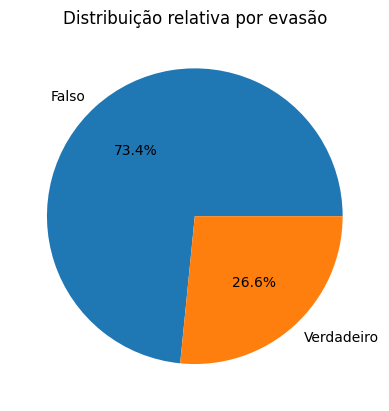

In [26]:
plt.pie(df_groupby.size(), labels=['Falso', 'Verdadeiro'], autopct='%1.1f%%')
plt.title("Distribuição relativa por evasão")
plt.show()

## Análise das variáveis categóricas

### Parceiro

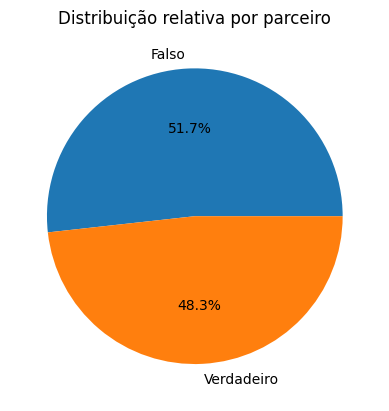

In [27]:
df_partner = df.groupby('Partner')
plt.pie(df_partner.size(), labels=['Falso', 'Verdadeiro'], autopct='%1.1f%%')
plt.title("Distribuição relativa por parceiro")
plt.show()

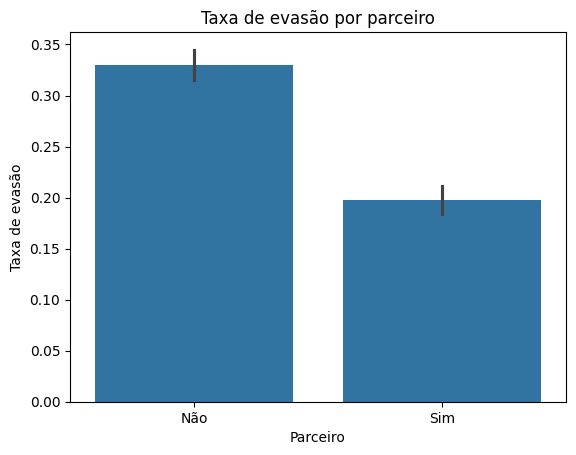

In [28]:
sns.barplot(data=df, x='Partner', y='Churn', estimator='mean')
plt.title('Taxa de evasão por parceiro')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.xlabel('Parceiro')
plt.ylabel('Taxa de evasão')
plt.show()

A taxa de evasão dos clientes solteiros é maior do que entre os clientes casados.

### Idade

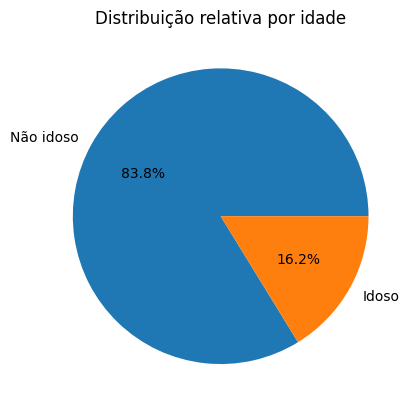

In [29]:
df_senior = df.groupby('SeniorCitizen')
plt.pie(df_senior.size(), labels=['Não idoso', 'Idoso'], autopct='%1.1f%%')
plt.title("Distribuição relativa por idade")
plt.show()

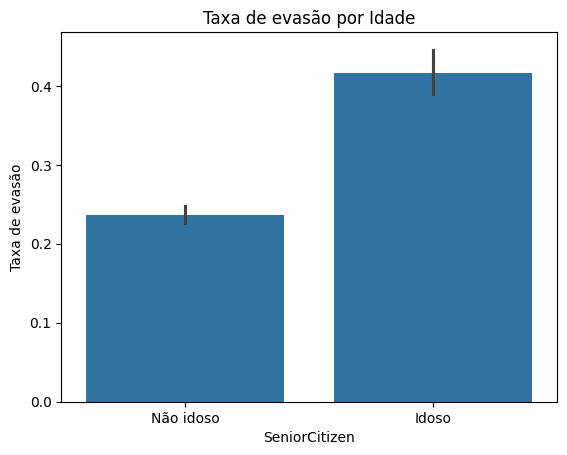

In [30]:
sns.barplot(data=df, x='SeniorCitizen', y='Churn', estimator='mean')
plt.title('Taxa de evasão por Idade')
plt.xticks([0, 1], ['Não idoso', 'Idoso'])
plt.ylabel('Taxa de evasão')
plt.show()

Os idosos são a minoria entre os clientes e possuem taxa de evasão maior em comparação à dos mais jovens.

### Tipo de contrato

In [31]:
df_contract = df.groupby('Contract')
df_contract.size()

,0
Contract,
Month-to-month,3875
One year,1472
Two year,1685


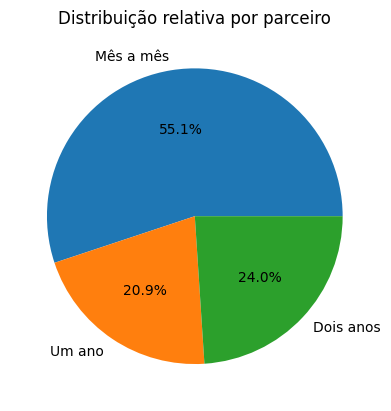

In [32]:
plt.pie(df_contract.size(), labels=['Mês a mês', 'Um ano', 'Dois anos'], autopct='%1.1f%%')
plt.title("Distribuição relativa por parceiro")
plt.show()

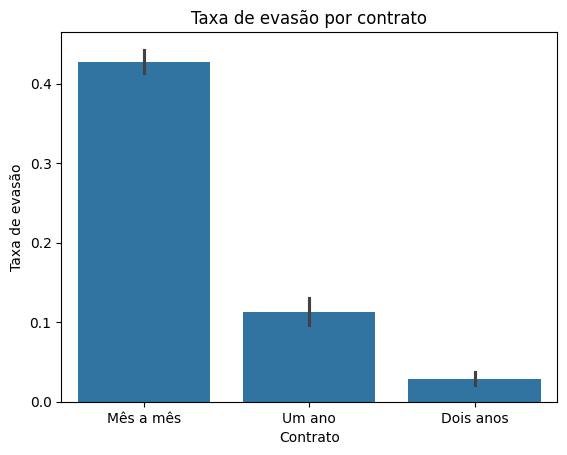

In [33]:
sns.barplot(data=df, x='Contract', y='Churn', estimator='mean')
plt.title('Taxa de evasão por contrato')
plt.xticks(['Month-to-month', 'One year', 'Two year'], ['Mês a mês', 'Um ano', 'Dois anos'])
plt.ylabel('Taxa de evasão')
plt.xlabel('Contrato')
plt.show()

Nota-se que os contratos mês a mês são maioria e a taxa de evasão nesses é significativamente maior em relação as demais modalidades de contrato.

### Dependentes

In [34]:
df_dependents = df.groupby('Dependents')
df_dependents.size()

,0
Dependents,
0,4933
1,2099


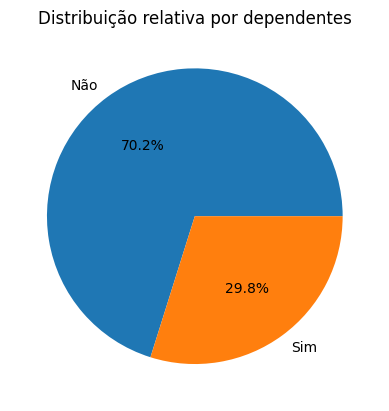

In [35]:
plt.pie(df_dependents.size(), labels=['Não', 'Sim'], autopct='%1.1f%%')
plt.title("Distribuição relativa por dependentes")
plt.show()

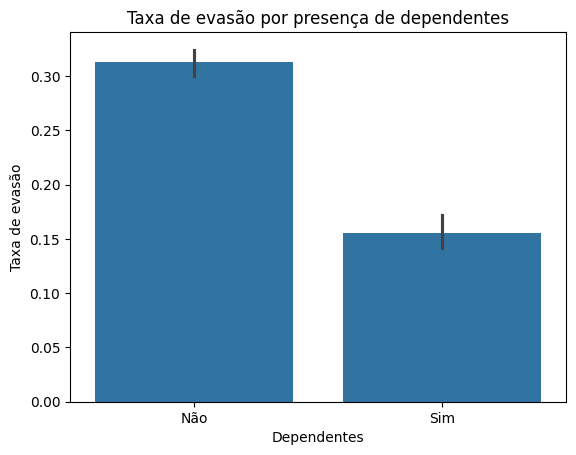

In [36]:
sns.barplot(data=df, x='Dependents', y='Churn', estimator='mean')
plt.title('Taxa de evasão por presença de dependentes')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.ylabel('Taxa de evasão')
plt.xlabel('Dependentes')
plt.show()

### Gênero

In [37]:
df_gender = df.groupby('gender')
df_gender.size()

,0
gender,
Female,3483
Male,3549


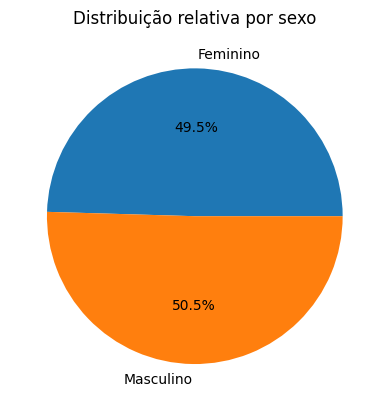

In [38]:
plt.pie(df_gender.size(), labels=['Feminino', 'Masculino'], autopct='%1.1f%%')
plt.title("Distribuição relativa por sexo")
plt.show()

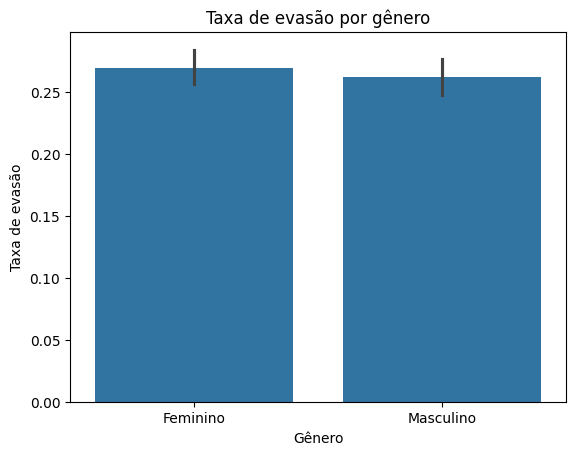

In [39]:
sns.barplot(data=df, x='gender', y='Churn', estimator='mean')
plt.title('Taxa de evasão por gênero')
plt.xticks([0, 1], ['Feminino', 'Masculino'])
plt.xlabel('Gênero')
plt.ylabel('Taxa de evasão')
plt.show()

### Pagamento digital

In [40]:
df_paperless = df.groupby('PaperlessBilling')
df_paperless.size()

,0
PaperlessBilling,
0,2864
1,4168


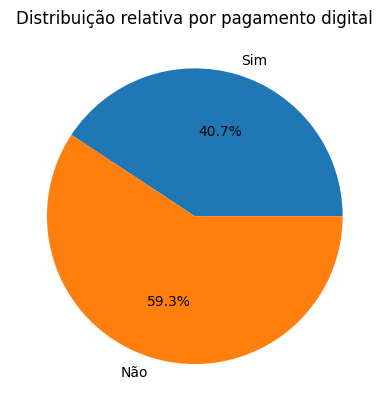

In [41]:
plt.pie(df_paperless.size(), labels=['Sim', 'Não'], autopct='%1.1f%%')
plt.title("Distribuição relativa por pagamento digital")
plt.show()

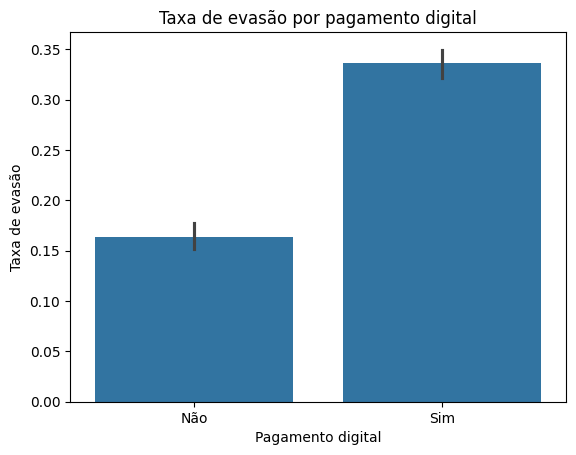

In [42]:
sns.barplot(data=df, x='PaperlessBilling', y='Churn', estimator='mean')
plt.title('Taxa de evasão por pagamento digital')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.ylabel('Taxa de evasão')
plt.xlabel('Pagamento digital')
plt.show()

### Distribuição das demais variáveis

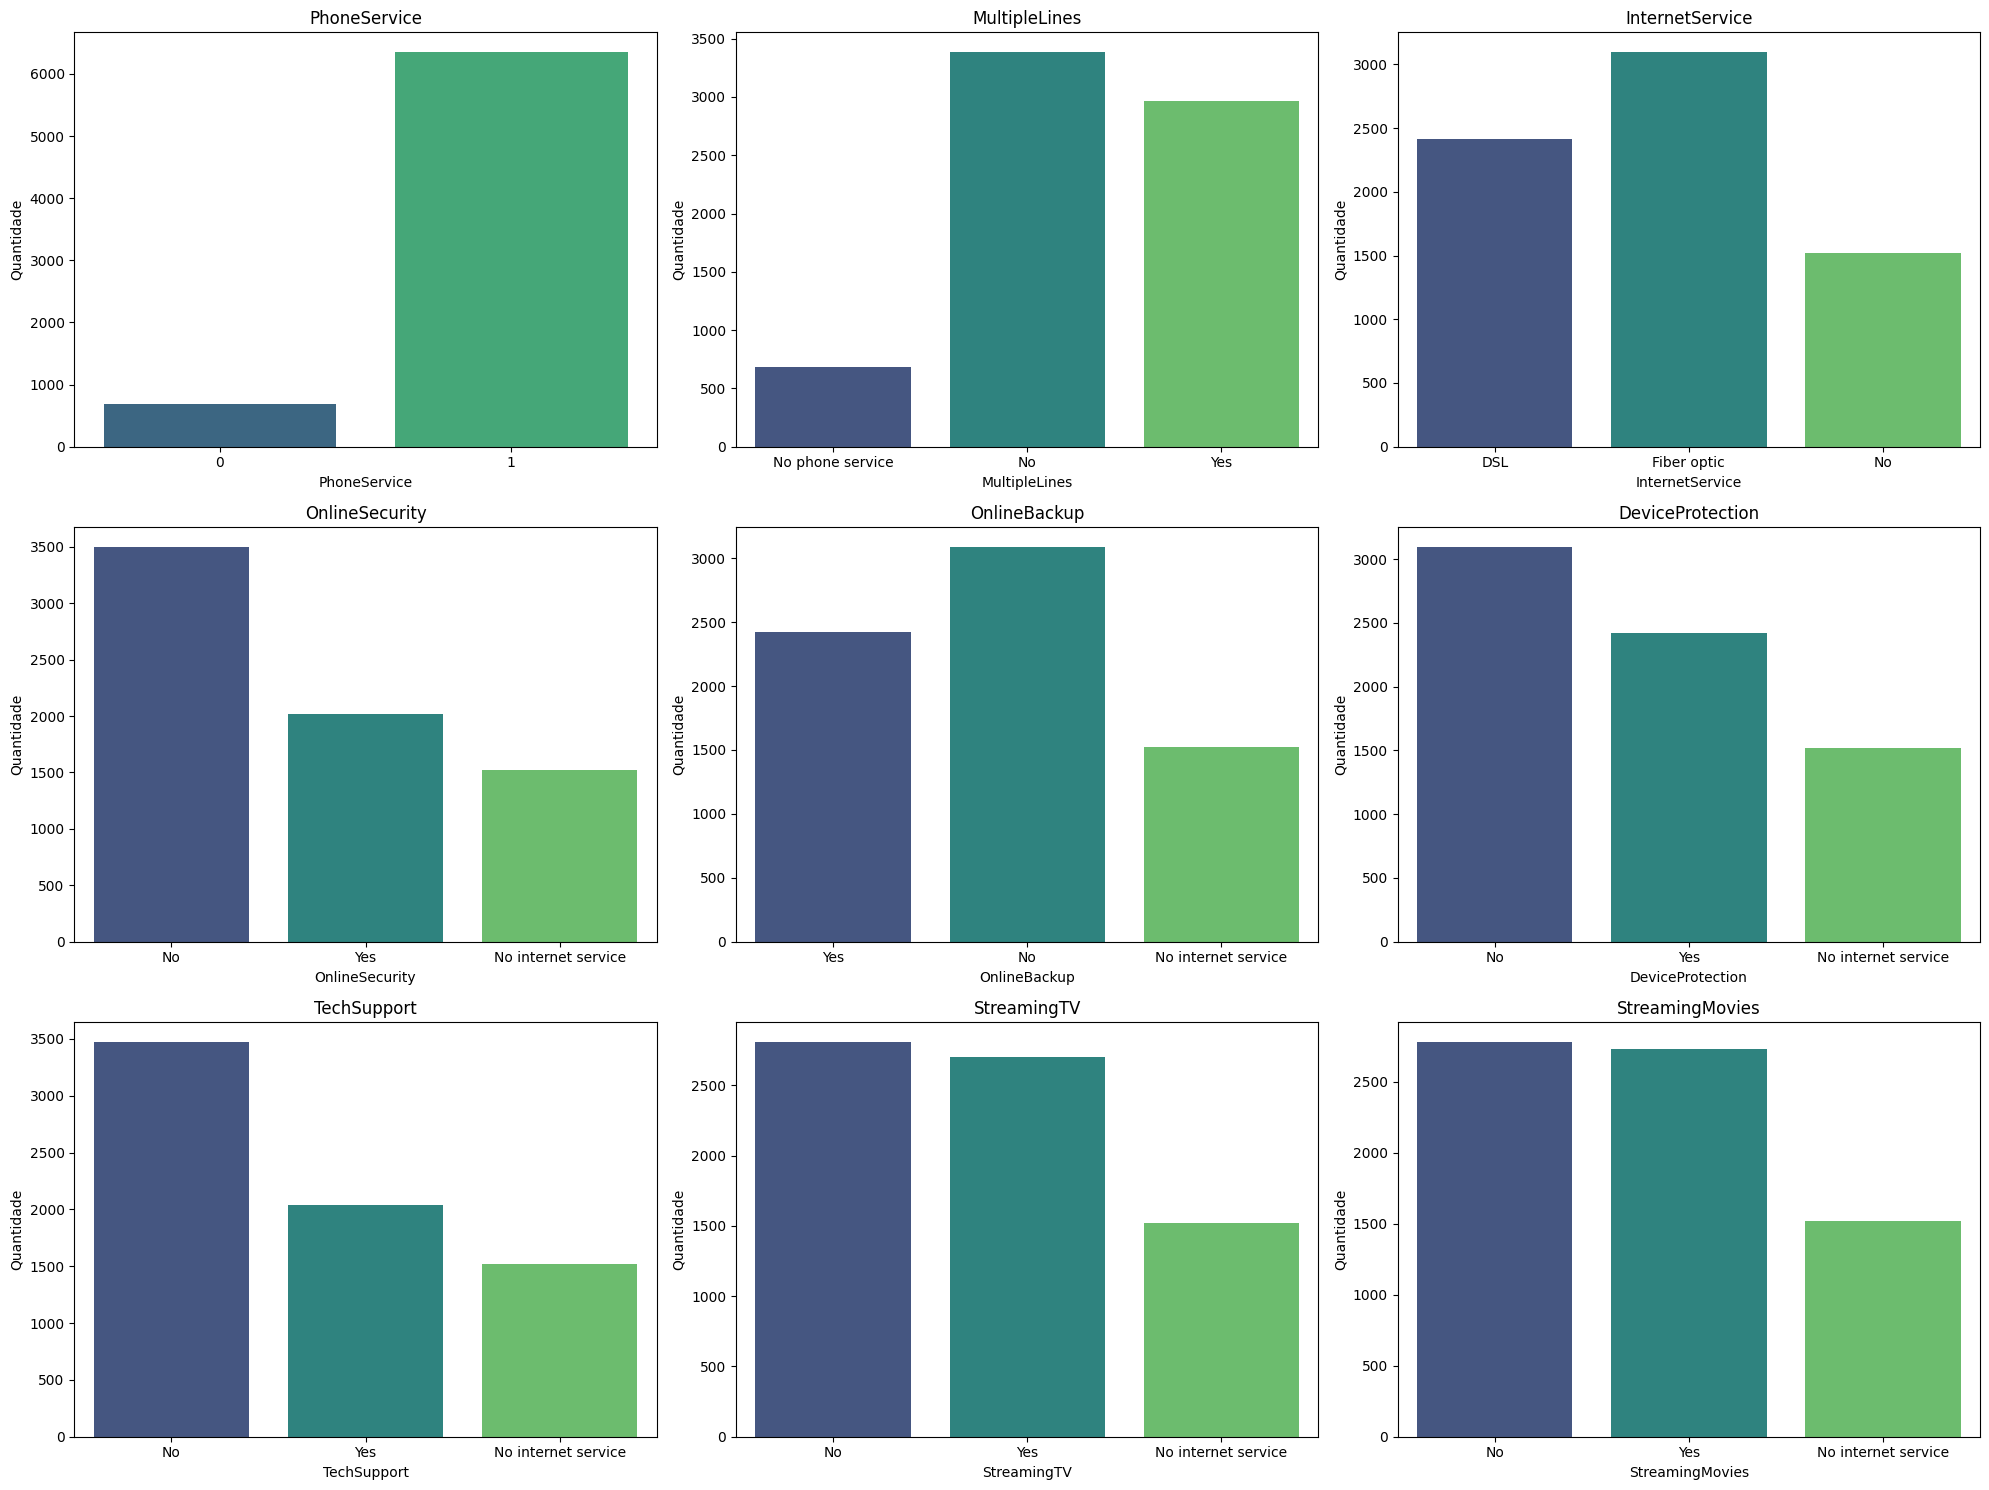

In [43]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
plt.figure(figsize=(20, 15))
for i, service in enumerate(services):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=service, hue=service, palette='viridis', legend=False)
    plt.ylabel('Quantidade')
    plt.title(service)
plt.tight_layout()
plt.show()

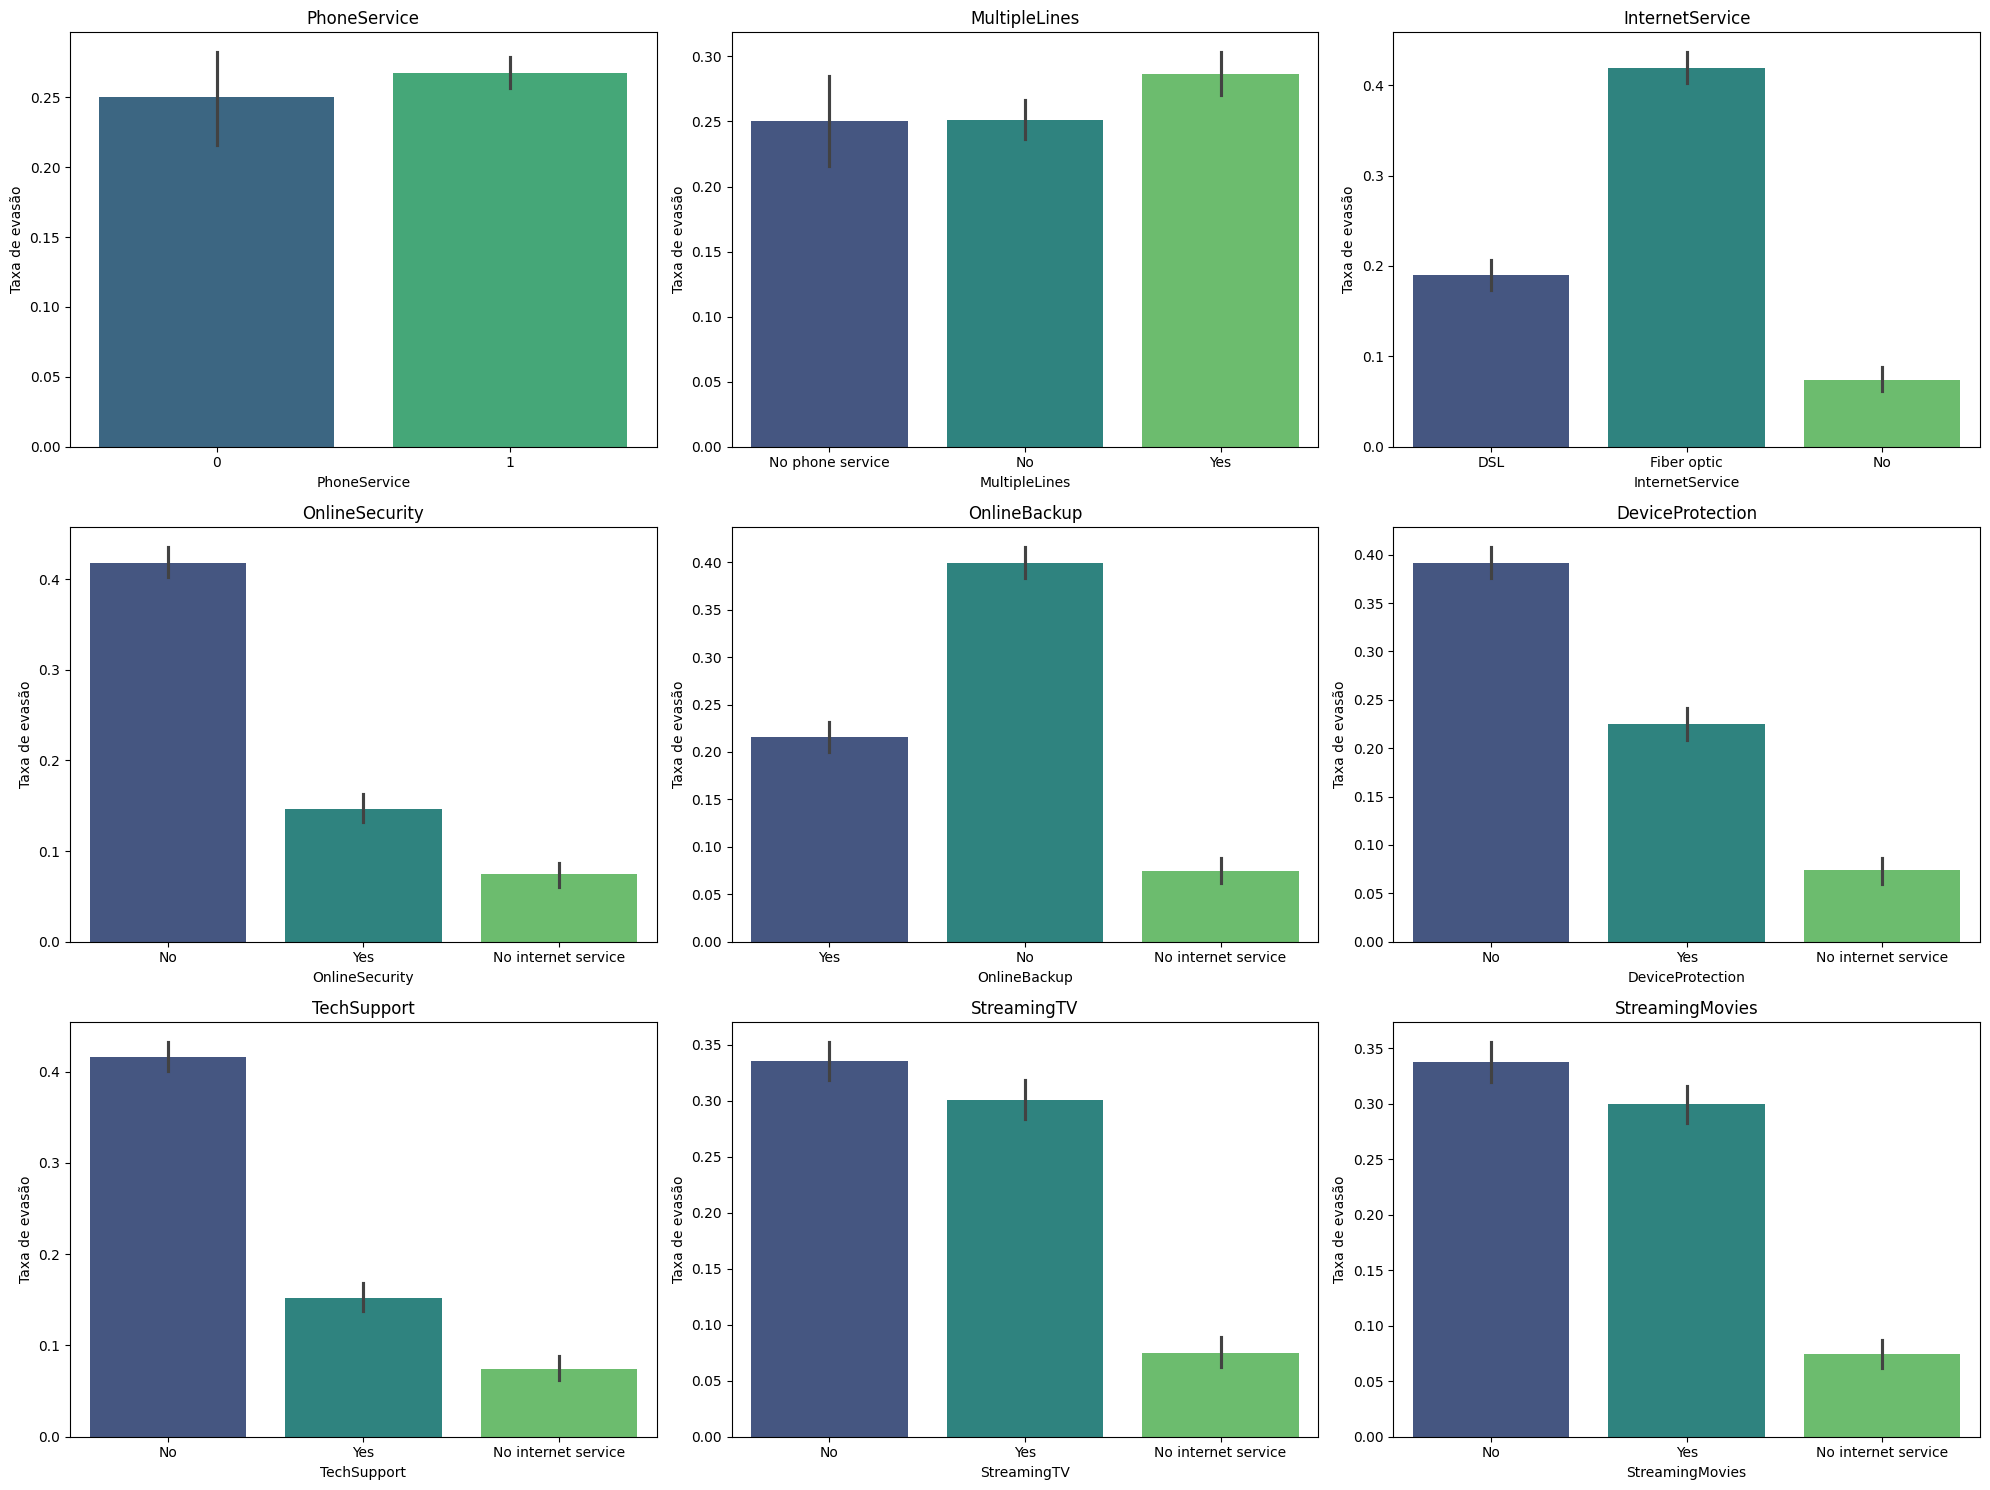

In [44]:
plt.figure(figsize=(20, 15))
for i, service in enumerate(services):
    plt.subplot(3, 3, i+1)
    sns.barplot(data=df, x=service, hue=service, palette='viridis', legend=False, y='Churn')
    plt.ylabel('Taxa de evasão')
    plt.title(service)
plt.tight_layout()
plt.show()

## Análise das variáveis numéricas

### Custo mensal

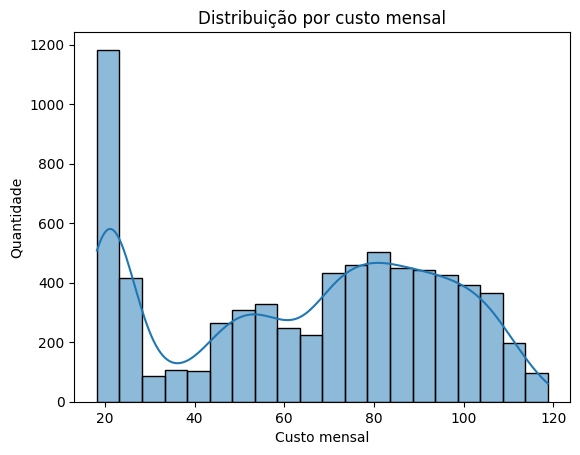

In [45]:
sns.histplot(data=df, x='MonthlyCharges', kde=True, bins= 20)
plt.ylabel('Quantidade')
plt.xlabel('Custo mensal')
plt.title("Distribuição por custo mensal")
plt.show()

Por esse gráfico, observa-se que boa parte dos clientes dessa empresa tem contratos mais em conta, pagam menos por mês. Porém, a maior parte dos clientes paga entre 40 e 120 dólares.

Text(0.5, 1.0, 'Distribuição por custo mensal')

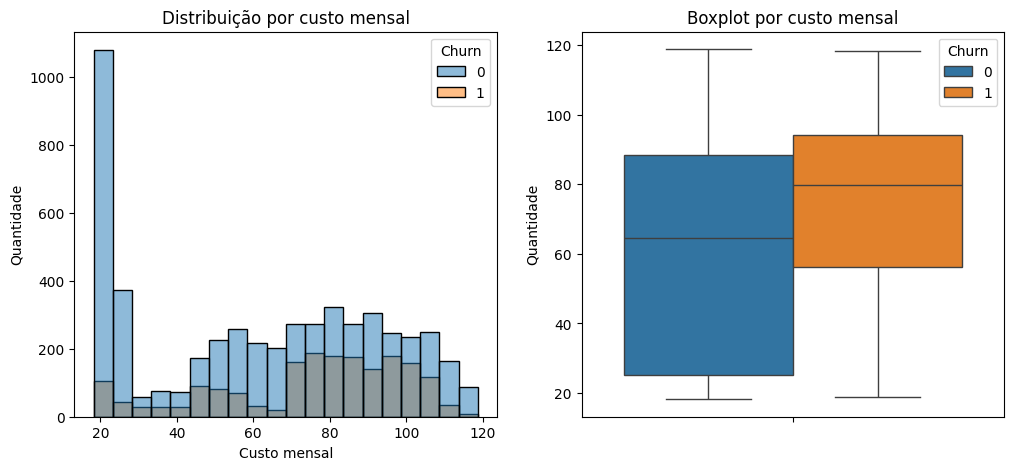

In [46]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,2)
sns.boxplot(data=df, y='MonthlyCharges', hue='Churn')
plt.ylabel('Quantidade')
plt.title("Boxplot por custo mensal")

plt.subplot(1,2,1)
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', bins= 20)
plt.ylabel('Quantidade')
plt.xlabel('Custo mensal')
plt.title("Distribuição por custo mensal")

### Tempo de assinatura do serviço

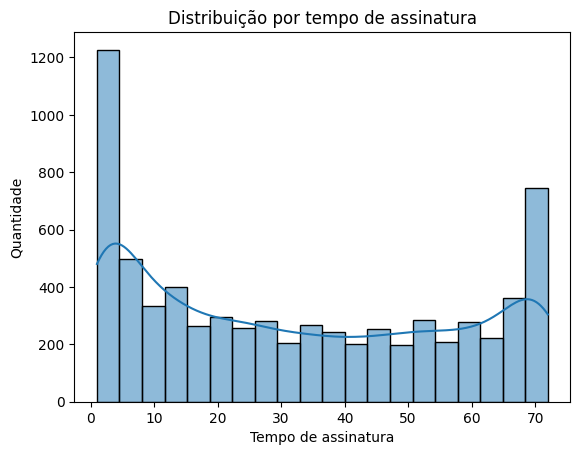

In [47]:
sns.histplot(data=df, x='tenure', kde=True, bins= 20)
plt.ylabel('Quantidade')
plt.xlabel('Tempo de assinatura')
plt.title("Distribuição por tempo de assinatura")
plt.show()

Text(0.5, 1.0, 'Distribuição por tempo de assinatura')

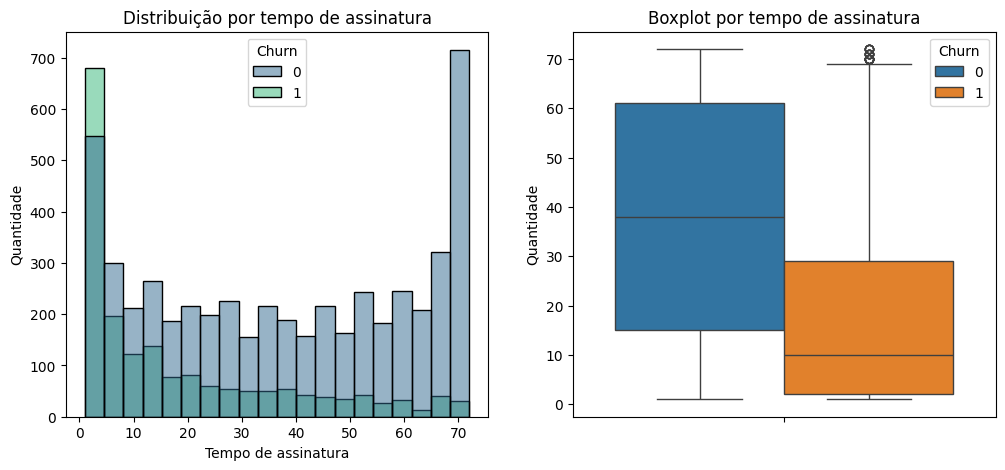

In [48]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,2)
sns.boxplot(data=df, y='tenure', hue='Churn' )
plt.ylabel('Quantidade')
plt.title("Boxplot por tempo de assinatura")

plt.subplot(1,2,1)
sns.histplot(data=df, x='tenure', hue='Churn', palette='viridis', bins= 20)
plt.ylabel('Quantidade')
plt.xlabel('Tempo de assinatura')
plt.title("Distribuição por tempo de assinatura")

Como pode-se ver pelo primeiro gráfico, as pessoas que tendem a fechar contrato (Churn = 1) não passam muito tempo com a empresa.

Pelo segundo gráfico (boxplot) é possível observar alguns outliers, que fecharam contrato mesmo com muito tempo com a empresa.

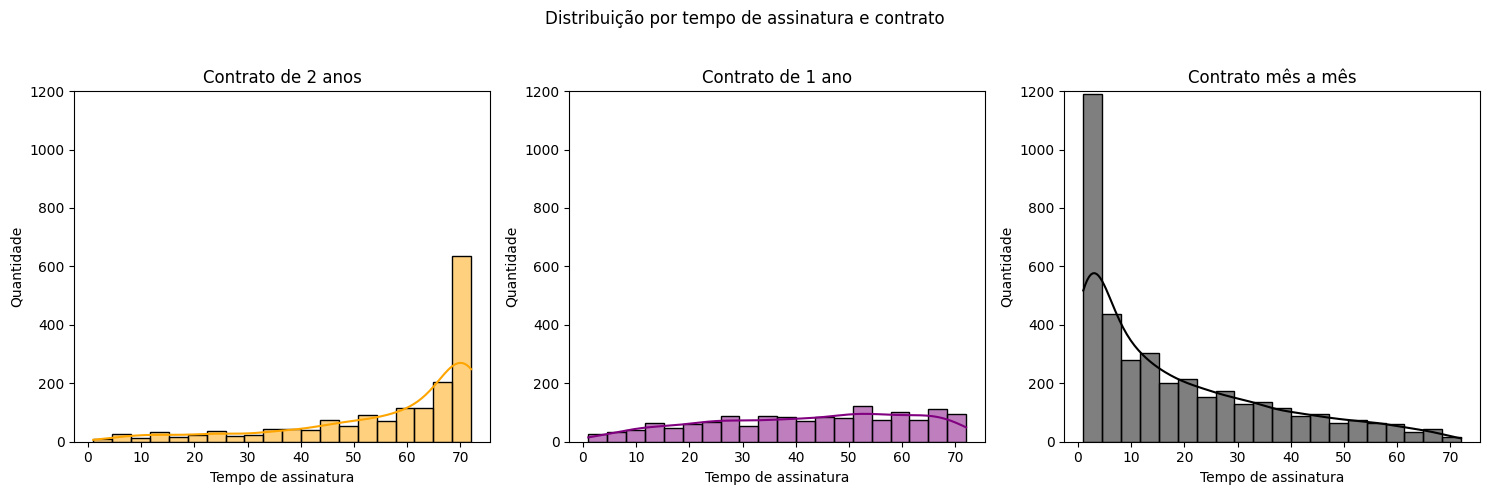

In [49]:
plt.figure(figsize=(15, 5), frameon=False)
plt.suptitle("Distribuição por tempo de assinatura e contrato\n")

plt.subplot(1, 3, 1)
TwoYear = df[df['Contract'] == 'Two year']
sns.histplot(data=TwoYear, x='tenure', kde=True, bins= 20, color='orange')
plt.ylabel('Quantidade')
plt.ylim(0,1200)
plt.xlabel('Tempo de assinatura')
plt.title("Contrato de 2 anos")


plt.subplot(1, 3, 2)
OneYear = df[df['Contract'] == 'One year']
sns.histplot(data=OneYear, x='tenure', kde=True, bins= 20, color='purple')
plt.ylabel('Quantidade')
plt.ylim(0,1200)
plt.xlabel('Tempo de assinatura')
plt.title("Contrato de 1 ano")

plt.subplot(1, 3, 3)
Mtm = df[df['Contract'] == 'Month-to-month']
sns.histplot(data=Mtm, x='tenure', kde=True, bins= 20, color='black')
plt.ylabel('Quantidade')
plt.ylim(0,1200)
plt.xlabel('Tempo de assinatura')
plt.title("Contrato mês a mês")

plt.tight_layout()
plt.show()

Os três gráficos acima mostram as tendências referentes a cada tipo de contrato:
* Boa parte dos clientes da empresa tem contratos de 2 anos e esses são os que permanecem por mais tempo.
* Poucos clientes optam pelo contrato de 1 ano
* A maioria dos clientes dessa empresa tem contratos mês a mês, e esses são os que passam menos tempo na empresa, com grande quantidade de Churn = 1.

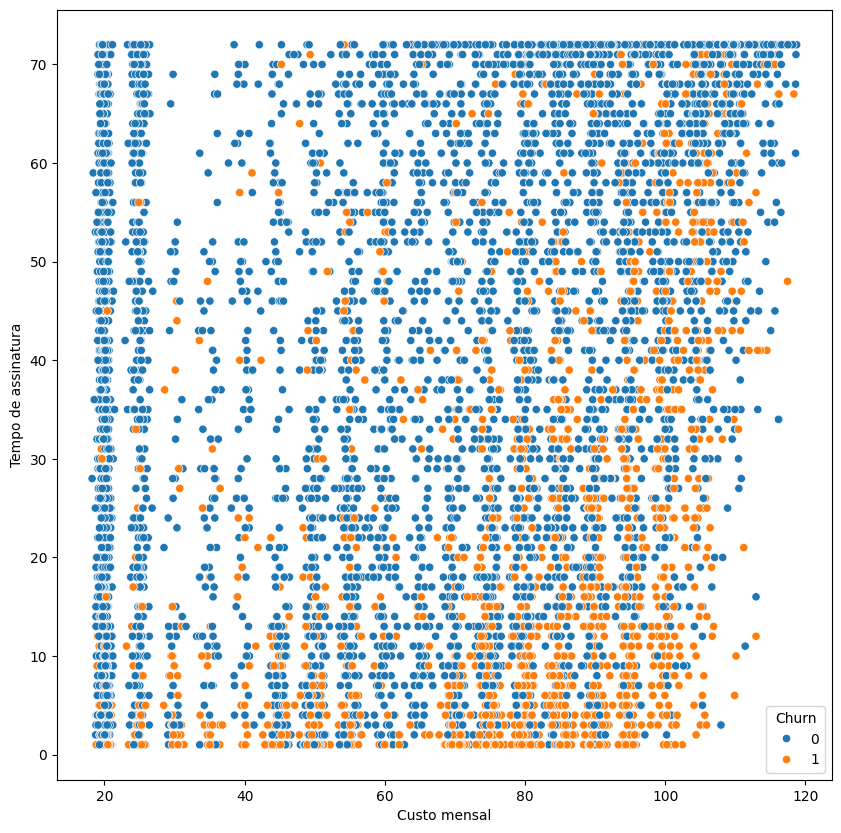

In [50]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x='MonthlyCharges', y='tenure', hue = 'Churn', data=df)
plt.ylabel('Tempo de assinatura')
plt.xlabel('Custo mensal')
plt.show()

O gráfico de dispersão acima mostra que, em média, pessoas que deixaram a empresa (Churn = 1) tinham um custo mensal maior e estavam na empresa por menos tempo que as que permaneceram (Churn = 0)

### Custo total pago

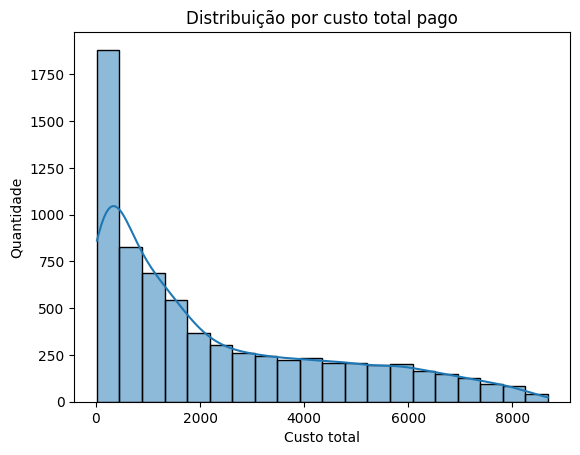

In [51]:
sns.histplot(data=df, x='TotalCharges', kde=True, bins= 20)
plt.title("Distribuição por custo total pago")
plt.xlabel('Custo total')
plt.ylabel('Quantidade')
plt.show()

O gráfico mostra que a maioria dos clientes atuais dessa empresa pagaram pouco no total, o que indica que estão com a empresa há pouco tempo.

Text(0.5, 1.0, 'Distribuição por custo total pago')

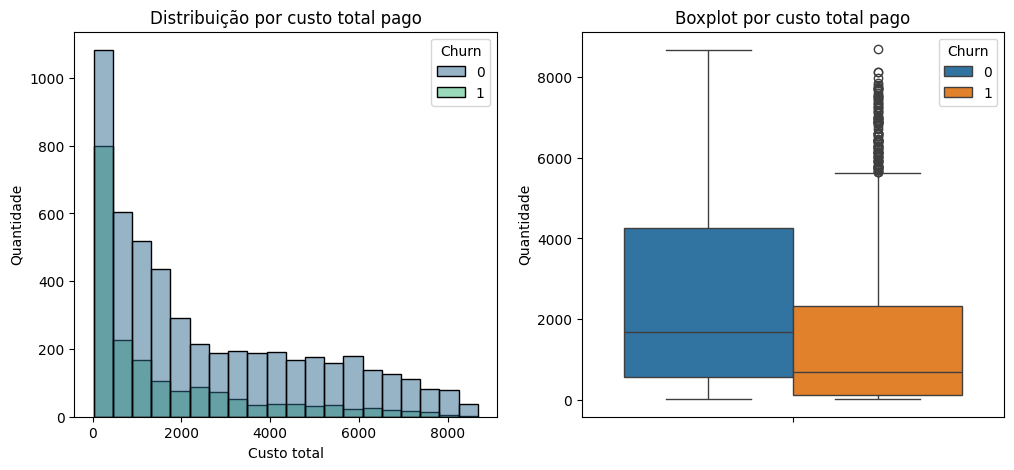

In [52]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,2)
sns.boxplot(data=df, y='TotalCharges', hue='Churn' )
plt.ylabel('Quantidade')
plt.title("Boxplot por custo total pago")

plt.subplot(1,2,1)
sns.histplot(data=df, x='TotalCharges', hue='Churn', palette='viridis', bins= 20)
plt.ylabel('Quantidade')
plt.xlabel('Custo total')
plt.title("Distribuição por custo total pago")

No BoxPlot pode-se observar um número relevante de outliers, clientes que deixaram a empresa mesmo com um grande valor total pago com o tempo.

Text(0.5, 1.0, 'Distribuição por custo total pago')

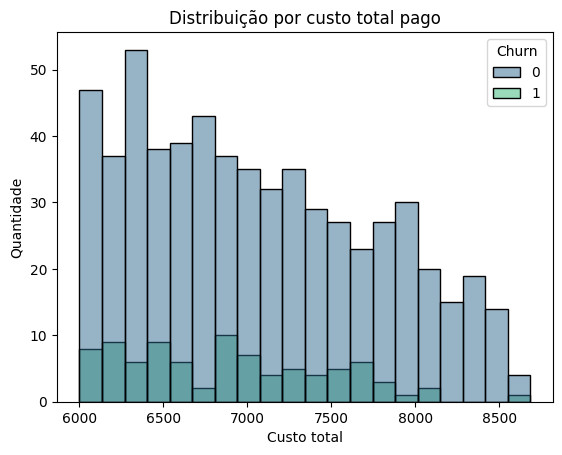

In [53]:
outliers_custo = df[df['TotalCharges'] > 6000]
sns.histplot(data=outliers_custo, x='TotalCharges', hue='Churn', bins= 20, palette='viridis')
plt.ylabel('Quantidade')
plt.xlabel('Custo total')
plt.title("Distribuição por custo total pago")

O gráfico acima mostra que a maioria das pessoas que continuaram com seus contratos já pagaram um total maior em comparação com os clientes que saíram. Isso corrobora com o gráfico anterior sobre tempo de contrato e o abandono dele.

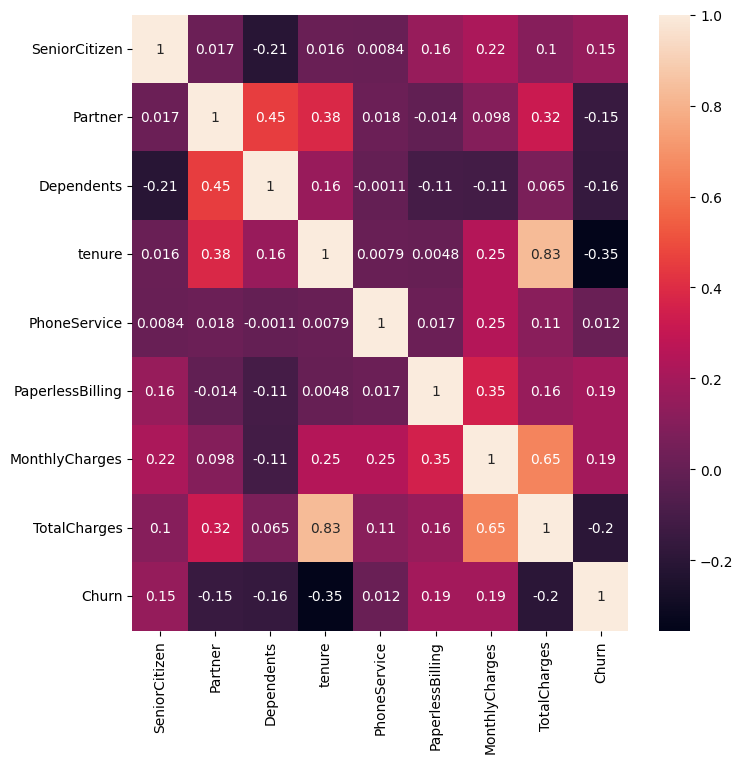

In [54]:
df_heatmap = df.select_dtypes(include=['number'])
plt.figure(figsize=(8, 8))
sns.heatmap(df_heatmap.corr(), annot=True)
plt.show()

Como é possível observar pelo mapa de calor, há correlação entre as seguintes variáveis:



---



*   TotalCharges (Total pago) x Tenure (Tempo de contrato)
    * Faz sentido, pois o total pago durante o tempo com a empresa aumenta com relação ao tempo de contratos.
*   Churn (Se cancelou ou não) x Tenure
    * Assim como foi visto em gráficos plotados, clientes que passam mais tempo com a empresa tendem a manter lealdade.
*   Tenure x Partner
    * 0.38 -> Pessoas com parceiros tendem a manter contratos mais longos



# Etapa 1 - Machine Learning

## Divisão Treino Validação e Teste

Faremos primeiramente a divisão dos dados em treino, validação e teste antes de padronizá-los a fim de evitar vazamento de dados

In [55]:
df_dummies = pd.get_dummies(df) # One-hot Encoding
df_dummies = df_dummies.replace({True: 1, False: 0})
df_dummies


/tmp/ipython-input-4281310162.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_dummies = df_dummies.replace({True: 1, False: 0})


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1,53.85,108.15,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,42.30,1840.75,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,1,70.70,151.65,1,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,84.80,1990.50,0,0,...,0,0,1,0,1,0,0,0,0,1
7039,0,1,1,72,1,1,103.20,7362.90,0,1,...,0,0,1,0,1,0,0,1,0,0
7040,0,1,1,11,0,1,29.60,346.45,0,1,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,0,4,1,1,74.40,306.60,1,0,...,1,0,0,1,0,0,0,0,0,1


In [56]:
X = df_dummies.drop('Churn', axis=1)
y = df_dummies['Churn'].values

In [57]:
from sklearn.model_selection import train_test_split
X_treino_val, X_teste, y_treino_val, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)
X_treino, X_val, y_treino, y_val = train_test_split(X_treino_val, y_treino_val, test_size=0.25, random_state=42)

print("Proporção Churn - Treino: ", y_treino.mean())
print("Proporção Churn - Validação: ", y_val.mean())
print("Proporção Churn - Teste: ", y_teste.mean())

Proporção Churn - Treino:  0.2626837363679469
Proporção Churn - Validação:  0.27505330490405117
Proporção Churn - Teste:  0.2658137882018479


## Padronização dos dados

### Escalando as variáveis para valores entre 0 e 1

In [58]:
from sklearn.preprocessing import MinMaxScaler
variaveis = X.columns.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_treino)
X_treino = pd.DataFrame(scaler.transform(X_treino))
X_val = pd.DataFrame(scaler.transform(X_val))
X_teste = pd.DataFrame(scaler.transform(X_teste))

## KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

knn = KNeighborsClassifier()

### Treino

In [60]:
knn.fit(X_treino, y_treino)

KNeighborsClassifier()

### Validação

In [61]:
y_val_proba_knn = knn.predict_proba(X_val)[:, 1]
y_val_pred_knn = knn.predict(X_val)

acuracia_val_knn = accuracy_score(y_val, y_val_pred_knn)
precisao_val_knn = precision_score(y_val, y_val_pred_knn)
recall_val_knn = recall_score(y_val, y_val_pred_knn)
f1_val_knn = f1_score(y_val, y_val_pred_knn)
roc_auc_val_knn = roc_auc_score(y_val, y_val_proba_knn)

print("Acurácia na validação:", acuracia_val_knn)
print("Precisão na validação:", precisao_val_knn)
print("Recall na validação:", recall_val_knn)
print("f1-Score na validação:", f1_val_knn)
print("ROC AUC na validação:", roc_auc_val_knn)

Acurácia na validação: 0.7640369580668088
Precisão na validação: 0.5749318801089919
Recall na validação: 0.5452196382428941
f1-Score na validação: 0.5596816976127321
ROC AUC na validação: 0.782161676039925


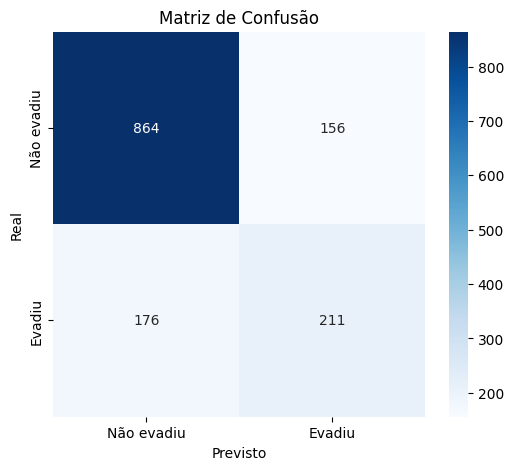

In [62]:
cm_val_knn = confusion_matrix(y_val, y_val_pred_knn)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_val_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Não evadiu", "Evadiu"],
            yticklabels=["Não evadiu", "Evadiu"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

### Tuning dos hiperparâmetros

In [63]:
n_neighbors = list(range(5, 83, 2)) # números impares de 5 ate 83
weights = ['uniform', 'distance']
algorithm= ['auto']
leaf_size= [30]
p= [2, 1]
metric=['minkowski', 'manhattan']
n_jobs= [-1]

parametros = {
              'n_neighbors': n_neighbors,
               'weights': weights,
               'algorithm': algorithm,
               'leaf_size': leaf_size,
               'p': p,
               'metric': metric,
               'n_jobs': n_jobs
        }

grid_search_knn = GridSearchCV(
                                knn,
                                parametros,
                                cv=5, # validação cruzada com 5 folds
                                scoring='recall' # otimizando para recall
                                )
grid_search_knn.fit(X_treino, y_treino)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto'], 'leaf_size': [30],
                         'metric': ['minkowski', 'manhattan'], 'n_jobs': [-1],
                         'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29, 31, 33, 35, 37, 39, 41, 43,
                                         45, 47, 49, 51, 53, 55, 57, 59, 61, 63, ...],
                         'p': [2, 1], 'weights': ['uniform', 'distance']},
             scoring='recall')

Otimizaremos para recall, pois essa métrica indica a proporção de positivos reais que foram corretamente classificados como positivos. Com isso, minimizamos a taxa de falsos negativos, que possuem maior custo na predição, já que indicam a classificação de um cliente que evadiria como um que não evadiria, trazendo malefícios para o propósito de negócios do modelo preditivo.

In [64]:
print("Melhores hiperparâmetros:", grid_search_knn.best_params_)
print("Melhor Recall na validação cruzada:", grid_search_knn.best_score_)

Melhores hiperparâmetros: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_jobs': -1, 'n_neighbors': 65, 'p': 1, 'weights': 'uniform'}
Melhor Recall na validação cruzada: 0.6029146793852677


### Teste

In [65]:
y_teste_proba_knn = grid_search_knn.predict_proba(X_teste)[:, 1]
y_teste_pred_knn = grid_search_knn.predict(X_teste)

acuracia_teste_knn = accuracy_score(y_teste, y_teste_pred_knn)
precisao_teste_knn = precision_score(y_teste, y_teste_pred_knn)
recall_teste_knn = recall_score(y_teste, y_teste_pred_knn)
f1_teste_knn = f1_score(y_teste, y_teste_pred_knn)
roc_auc_teste_knn = roc_auc_score(y_teste, y_teste_proba_knn)

print("Acurácia no teste:", acuracia_teste_knn)
print("Precisão no teste:", precisao_teste_knn)
print("Recall no teste:", recall_teste_knn)
print("f1-Score no teste:", f1_teste_knn)
print("ROC AUC no teste:", roc_auc_teste_knn)

Acurácia no teste: 0.7654584221748401
Precisão no teste: 0.5575916230366492
Recall no teste: 0.56951871657754
f1-Score no teste: 0.5634920634920635
ROC AUC no teste: 0.8151301178748364


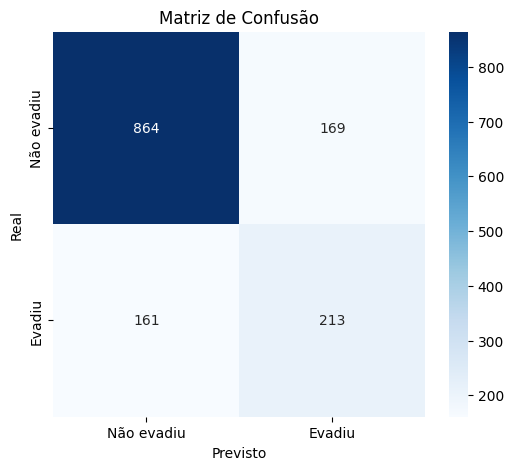

In [66]:
cm_teste_knn = confusion_matrix(y_teste, y_teste_pred_knn)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_teste_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Não evadiu", "Evadiu"],
            yticklabels=["Não evadiu", "Evadiu"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

## Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42) # reproductiblidade

### Treino

In [68]:
rf.fit(X_treino, y_treino)

RandomForestClassifier(random_state=42)

### Validação

In [69]:
y_val_proba_rf = rf.predict_proba(X_val)[:, 1]
y_val_pred_rf = rf.predict(X_val)

acuracia_val_rf = accuracy_score(y_val, y_val_pred_rf)
precisao_val_rf = precision_score(y_val, y_val_pred_rf)
recall_val_rf = recall_score(y_val, y_val_pred_rf)
f1_val_rf = f1_score(y_val, y_val_pred_rf)
roc_auc_val_rf = roc_auc_score(y_val, y_val_proba_rf)

print("Acurácia na validação:", acuracia_val_rf)
print("Precisão na validação:", precisao_val_rf)
print("Recall na validação:", recall_val_rf)
print("f1-Score na validação:", f1_val_rf)
print("ROC AUC na validação:", roc_auc_val_rf)

Acurácia na validação: 0.7810945273631841
Precisão na validação: 0.6415770609318996
Recall na validação: 0.4625322997416021
f1-Score na validação: 0.5375375375375375
ROC AUC na validação: 0.8233508131934945


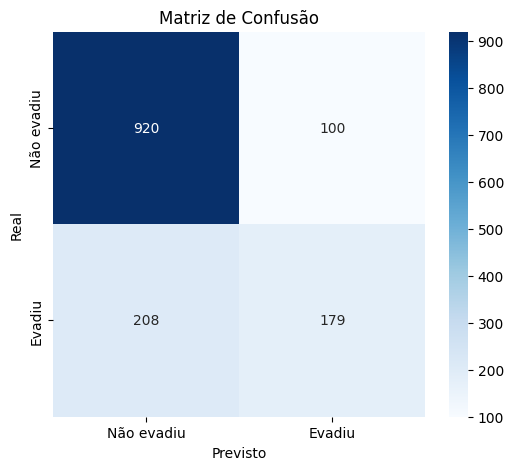

In [70]:
cm_val_rf = confusion_matrix(y_val, y_val_pred_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_val_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Não evadiu", "Evadiu"],
            yticklabels=["Não evadiu", "Evadiu"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

### Tuning dos hiperparâmetros

In [71]:
# Numero de arvores em floresta aleatoria
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 100)]
# Numero de features a serem consideradas em cada splita
max_features = ['log2', 'sqrt']
# Profundidade maxima da arvore
max_depth = [1, 6, 11, 16, 21, None]
# Numero minimo de amostras para separar um nó
min_samples_split = [2, 5, 10]
# Numero minimo de amostras para cada nó de folha
min_samples_leaf = [1, 2, 4]

parametros = {
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }

random_search_rf = RandomizedSearchCV(rf, parametros, cv=5, scoring='recall', n_jobs=-1, random_state=42)
random_search_rf.fit(X_treino, y_treino)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 6, 11, 16, 21, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 109, 118, 127,
                                                         136, 145, 154, 163,
                                                         172, 181, 190, 200,
                                                         209, 218, 227, 236,
                                                         245, 254, 263, 272,
                                                         281, 290, 300, 309,
                                                         318, 327, 336, 345,
                                                         354, 363, ...]},
                   random_state=42, scoring='recall')

In [72]:
print("Melhores hiperparâmetros:", random_search_rf.best_params_)
print("Melhor Recall na validação cruzada:", random_search_rf.best_score_)

Melhores hiperparâmetros: {'n_estimators': 927, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 11}
Melhor Recall na validação cruzada: 0.5135828135828137


### Teste

In [73]:
y_teste_proba_rf = random_search_rf.predict_proba(X_teste)[:, 1]
y_teste_pred_rf = random_search_rf.predict(X_teste)

acuracia_teste_rf = accuracy_score(y_teste, y_teste_pred_rf)
precisao_teste_rf = precision_score(y_teste, y_teste_pred_rf)
recall_teste_rf = recall_score(y_teste, y_teste_pred_rf)
f1_teste_rf = f1_score(y_teste, y_teste_pred_rf)
roc_auc_teste_rf = roc_auc_score(y_teste, y_teste_proba_rf)

print("Acurácia no teste:", acuracia_teste_rf)
print("Precisão no teste:", precisao_teste_rf)
print("Recall no teste:", recall_teste_rf)
print("f1-Score no teste:", f1_teste_rf)
print("ROC AUC no teste:", roc_auc_teste_rf)

Acurácia no teste: 0.7882018479033405
Precisão no teste: 0.6428571428571429
Recall no teste: 0.4572192513368984
f1-Score no teste: 0.534375
ROC AUC no teste: 0.828079784232623


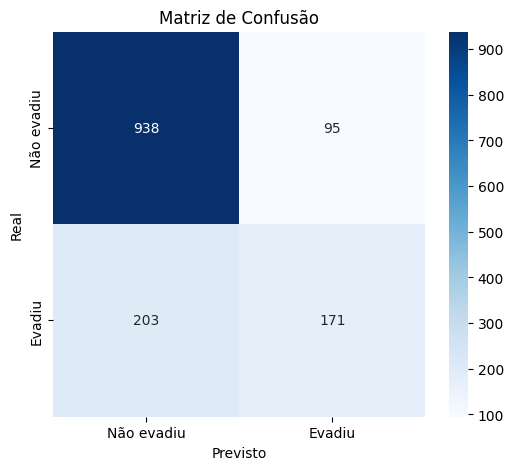

In [74]:
cm_teste_rf = confusion_matrix(y_teste, y_teste_pred_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_teste_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Não evadiu", "Evadiu"],
            yticklabels=["Não evadiu", "Evadiu"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

## Regressão Logística

In [75]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
                        random_state=42, # reproductibilidade
                        solver='liblinear', # bom para datasets pequenos
                        max_iter=1000 # permite alto número de iterações até encontrar a convergência
                        )

### Treino

In [76]:
lr.fit(X_treino, y_treino)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [77]:
print('Convergência do modelo:', lr.n_iter_)

Convergência do modelo: [7]


In [78]:
coeficientes = pd.DataFrame({'Variável': X.columns, 'Coeficiente': lr.coef_[0]})
coeficientes = coeficientes.sort_values(by='Coeficiente', ascending=False)
print(coeficientes)

                                   Variável  Coeficiente
7                              TotalCharges     1.290470
34                  Contract_Month-to-month     0.643001
14              InternetService_Fiber optic     0.444342
5                          PaperlessBilling     0.291453
0                             SeniorCitizen     0.279313
39           PaymentMethod_Electronic check     0.200405
25                           TechSupport_No     0.186777
16                        OnlineSecurity_No     0.161622
30                          StreamingTV_Yes     0.129973
33                      StreamingMovies_Yes     0.112915
1                                   Partner     0.052095
24                     DeviceProtection_Yes     0.033225
11           MultipleLines_No phone service     0.032495
19                          OnlineBackup_No     0.013288
12                        MultipleLines_Yes     0.003051
21                         OnlineBackup_Yes    -0.031479
22                      DeviceP

Esses coeficientes representam o impacto das variáveis na probabilidade de evasão. Um coeficiente positivo indica que quando esse valor cresce, também cresce a probabilidade de evasão, e vice-versa para os coeficientes negativos.

Maiores coeficientes beta:
  * Custo total
  * Contrato mês a mês
  * Serviço de internet fibra óptica

Menores coeficientes beta:
  * Tempo de assinatura do serviço
  * Contrato de dois anos
  * Serviço de internet DSL

Reforçando o que foi observado na análise exploratória dos dados

###Validação

In [79]:
y_val_proba_lr = lr.predict_proba(X_val)[:, 1]
y_val_pred_lr = lr.predict(X_val)

acuracia_val_lr = accuracy_score(y_val, y_val_pred_lr)
precisao_val_lr = precision_score(y_val, y_val_pred_lr)
recall_val_lr = recall_score(y_val, y_val_pred_lr)
f1_val_lr = f1_score(y_val, y_val_pred_lr)
roc_auc_val_lr = roc_auc_score(y_val, y_val_proba_lr)

print("Acurácia na validação:", acuracia_val_lr)
print("Precisão na validação:", precisao_val_lr)
print("Recall na validação:", recall_val_lr)
print("f1-Score na validação:", f1_val_lr)
print("ROC AUC na validação:", roc_auc_val_lr)

Acurácia na validação: 0.8009950248756219
Precisão na validação: 0.6606606606606606
Recall na validação: 0.5684754521963824
f1-Score na validação: 0.6111111111111112
ROC AUC na validação: 0.8536859705122358


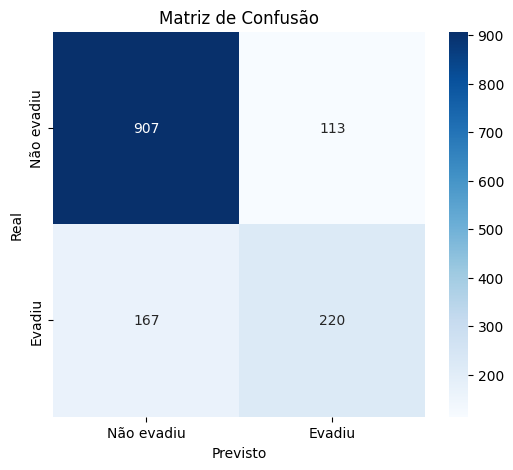

In [80]:
cm_val_lr = confusion_matrix(y_val, y_val_pred_lr)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_val_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Não evadiu", "Evadiu"],
            yticklabels=["Não evadiu", "Evadiu"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

### Tuning dos hiperparâmetros

In [81]:
parametros = {
              'C': [0.001, 0.01, 0.1, 1, 10, 100], # inverso da força de regularização
              'penalty': ['l1', 'l2'], # penalidade aplicada
              'class_weight': ['balanced', None], # pesos associados às classes, 'balanced' ajusta os pesos de modo inversamente proporcional a frequência das classes
        }

grid_search_lr = GridSearchCV(
                                lr,
                                parametros,
                                cv=5, # validação cruzada com 5 fols
                                scoring='recall' # otimizando para recall
                              )
grid_search_lr.fit(X_treino, y_treino)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, random_state=42,
                                          solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [82]:
print("Melhores hiperparâmetros:", grid_search_lr.best_params_)
print("Melhor Recall na validação cruzada:", grid_search_lr.best_score_)

Melhores hiperparâmetros: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1'}
Melhor Recall na validação cruzada: 0.8592026415555827


### Teste

In [83]:
y_teste_proba_lr = grid_search_lr.predict_proba(X_teste)[:, 1]
y_teste_pred_lr = grid_search_lr.predict(X_teste)

acuracia_teste_lr = accuracy_score(y_teste, y_teste_pred_lr)
precisao_teste_lr = precision_score(y_teste, y_teste_pred_lr)
recall_teste_lr = recall_score(y_teste, y_teste_pred_lr)
f1_teste_lr = f1_score(y_teste, y_teste_pred_lr)
roc_auc_teste_lr = roc_auc_score(y_teste, y_teste_proba_lr)

print("Acurácia no teste:", acuracia_teste_lr)
print("Precisão no teste:", precisao_teste_lr)
print("Recall no teste:", recall_teste_lr)
print("f1-Score no teste:", f1_teste_lr)
print("ROC AUC no teste:", roc_auc_teste_lr)

Acurácia no teste: 0.7014925373134329
Precisão no teste: 0.4655688622754491
Recall no teste: 0.8315508021390374
f1-Score no teste: 0.5969289827255279
ROC AUC no teste: 0.826729943935684


Dentre os modelos testados, apresentou maior recall, métrica para qual otimizaremos primariamente a fim de evitar falsos negativos.

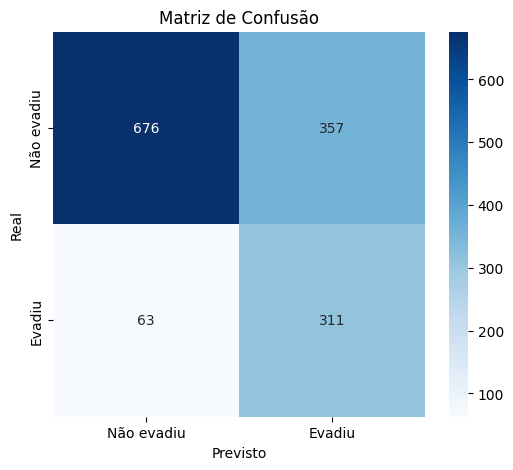

In [84]:
cm_teste_lr = confusion_matrix(y_teste, y_teste_pred_lr)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_teste_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Não evadiu", "Evadiu"],
            yticklabels=["Não evadiu", "Evadiu"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

# Etapa 2 - Técnicas de reamostragem

## Random Oversampling

Esta técnica usa de um algoritmo que escolher randomicamente amostras da classe minoritária, com reposição, e as duplica a fim de equilibrar as classes.

In [85]:
from imblearn.over_sampling import RandomOverSampler

In [86]:
ros = RandomOverSampler(random_state=42)
X_treino_ros, y_treino_ros = ros.fit_resample(X_treino, y_treino)

In [87]:
print(X_treino.shape)
print(X_treino_ros.shape)

(4218, 41)
(6220, 41)


In [88]:
print("Proporção Churn - Treino: ", y_treino_ros.mean())
print("Proporção Churn - Validação: ", y_val.mean())
print("Proporção Churn - Teste: ", y_teste.mean())

Proporção Churn - Treino:  0.5
Proporção Churn - Validação:  0.27505330490405117
Proporção Churn - Teste:  0.2658137882018479


### KNN - RandomOversampling


#### Treino

In [89]:
knn_ros = KNeighborsClassifier()

In [90]:
knn_ros.fit(X_treino_ros, y_treino_ros)

KNeighborsClassifier()

#### Validação

In [91]:
y_val_proba_knn_ros = knn_ros.predict_proba(X_val)[:, 1]
y_val_pred_knn_ros = knn_ros.predict(X_val)

acuracia_val_knn_ros = accuracy_score(y_val, y_val_pred_knn_ros)
precisao_val_knn_ros = precision_score(y_val, y_val_pred_knn_ros)
recall_val_knn_ros = recall_score(y_val, y_val_pred_knn_ros)
f1_val_knn_ros = f1_score(y_val, y_val_pred_knn_ros)
roc_auc_val_knn_ros = roc_auc_score(y_val, y_val_proba_knn_ros)

print("Acurácia na validação:", acuracia_val_knn_ros)
print("Precisão na validação:", precisao_val_knn_ros)
print("Recall na validação:", recall_val_knn_ros)
print("f1-Score na validação:", f1_val_knn_ros)
print("ROC AUC na validação:", roc_auc_val_knn_ros)

Acurácia na validação: 0.6730632551528074
Precisão na validação: 0.4427001569858713
Recall na validação: 0.7286821705426356
f1-Score na validação: 0.55078125
ROC AUC na validação: 0.7515035213051628


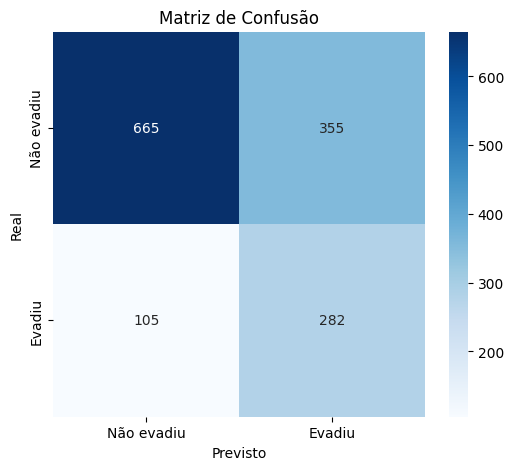

In [92]:
cm_val_knn_ros = confusion_matrix(y_val, y_val_pred_knn_ros)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_val_knn_ros, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Não evadiu", "Evadiu"],
            yticklabels=["Não evadiu", "Evadiu"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

#### Tuning dos hiperparâmetros

In [93]:
n_neighbors = list(range(5, 83, 2)) # números impares de 5 ate 83
weights = ['uniform', 'distance']
algorithm= ['auto']
leaf_size= [30]
p= [2, 1]
metric=['minkowski', 'manhattan']
n_jobs= [-1]

parametros = {
              'n_neighbors': n_neighbors,
               'weights': weights,
               'algorithm': algorithm,
               'leaf_size': leaf_size,
               'p': p,
               'metric': metric,
               'n_jobs': n_jobs
        }

grid_search_knn_ros = GridSearchCV(
                                knn_ros,
                                parametros,
                                cv=5, # validação cruzada com 5 folds
                                scoring='recall' # otimizando para recall
                                )
grid_search_knn_ros.fit(X_treino_ros, y_treino_ros)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto'], 'leaf_size': [30],
                         'metric': ['minkowski', 'manhattan'], 'n_jobs': [-1],
                         'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29, 31, 33, 35, 37, 39, 41, 43,
                                         45, 47, 49, 51, 53, 55, 57, 59, 61, 63, ...],
                         'p': [2, 1], 'weights': ['uniform', 'distance']},
             scoring='recall')

In [94]:
print("Melhores hiperparâmetros:", grid_search_knn_ros.best_params_)
print("Melhor Recall na validação cruzada:", grid_search_knn_ros.best_score_)

Melhores hiperparâmetros: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_jobs': -1, 'n_neighbors': 79, 'p': 2, 'weights': 'distance'}
Melhor Recall na validação cruzada: 0.984887459807074


#### Teste

In [95]:
y_teste_ros_proba_knn = grid_search_knn_ros.predict_proba(X_teste)[:, 1]
y_teste_pred_knn_ros = grid_search_knn_ros.predict(X_teste)

acuracia_teste_knn_ros = accuracy_score(y_teste, y_teste_pred_knn_ros)
precisao_teste_knn_ros = precision_score(y_teste, y_teste_pred_knn_ros)
recall_teste_knn_ros = recall_score(y_teste, y_teste_pred_knn_ros)
f1_teste_knn_ros = f1_score(y_teste, y_teste_pred_knn_ros)
roc_auc_teste_knn_ros = roc_auc_score(y_teste, y_teste_proba_knn)

print("Acurácia no teste:", acuracia_teste_knn_ros)
print("Precisão no teste:", precisao_teste_knn_ros)
print("Recall no teste:", recall_teste_knn_ros)
print("f1-Score no teste:", f1_teste_knn_ros)
print("ROC AUC no teste:", roc_auc_teste_knn_ros)

Acurácia no teste: 0.6744847192608386
Precisão no teste: 0.4387755102040816
Recall no teste: 0.8048128342245989
f1-Score no teste: 0.5679245283018868
ROC AUC no teste: 0.8151301178748364


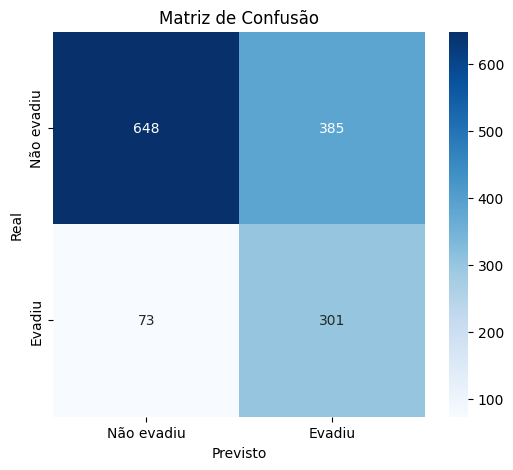

In [96]:
cm_teste_knn_ros = confusion_matrix(y_teste, y_teste_pred_knn_ros)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_teste_knn_ros, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Não evadiu", "Evadiu"],
            yticklabels=["Não evadiu", "Evadiu"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

### Random Forest - RandomOversampling

In [97]:
rf_ros = RandomForestClassifier(random_state=42)

#### Treino

In [98]:
rf_ros.fit(X_treino_ros, y_treino_ros)

RandomForestClassifier(random_state=42)

#### Validação

In [99]:
y_val_proba_rf_ros = rf_ros.predict_proba(X_val)[:, 1]
y_val_pred_rf_ros = rf_ros.predict(X_val)

acuracia_val_rf_ros = accuracy_score(y_val, y_val_pred_rf_ros)
precisao_val_rf_ros = precision_score(y_val, y_val_pred_rf_ros)
recall_val_rf_ros = recall_score(y_val, y_val_pred_rf_ros)
f1_val_rf_ros = f1_score(y_val, y_val_pred_rf_ros)
roc_auc_val_rf_ros = roc_auc_score(y_val, y_val_proba_rf_ros)

print("Acurácia na validação:", acuracia_val_rf_ros)
print("Precisão na validação:", precisao_val_rf_ros)
print("Recall na validação:", recall_val_rf_ros)
print("f1-Score na validação:", f1_val_rf_ros)
print("ROC AUC na validação:", roc_auc_val_rf_ros)

Acurácia na validação: 0.7725657427149965
Precisão na validação: 0.5912806539509536
Recall na validação: 0.5607235142118863
f1-Score na validação: 0.5755968169761273
ROC AUC na validação: 0.8234128793636318


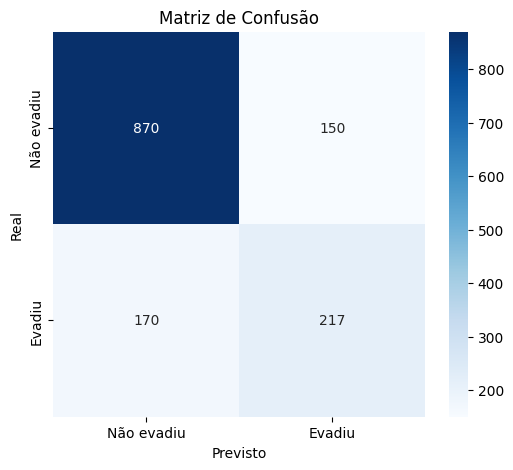

In [100]:
cm_val_rf_ros = confusion_matrix(y_val, y_val_pred_rf_ros)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_val_rf_ros, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Não evadiu", "Evadiu"],
            yticklabels=["Não evadiu", "Evadiu"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

#### Tuning dos hiperparâmetros

In [101]:
# Numero de arvores em floresta aleatoria
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 100)]
# Numero de features a serem consideradas em cada splita
max_features = ['log2', 'sqrt']
# Profundidade maxima da arvore
max_depth = [1, 6, 11, 16, 21, None]
# Numero minimo de amostras para separar um nó
min_samples_split = [2, 5, 10]
# Numero minimo de amostras para cada nó de folha
min_samples_leaf = [1, 2, 4]

parametros = {
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }

random_search_rf_ros = RandomizedSearchCV(rf_ros, parametros, cv=5, scoring='recall', n_jobs=-1, random_state=42)
random_search_rf_ros.fit(X_treino_ros, y_treino_ros)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 6, 11, 16, 21, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 109, 118, 127,
                                                         136, 145, 154, 163,
                                                         172, 181, 190, 200,
                                                         209, 218, 227, 236,
                                                         245, 254, 263, 272,
                                                         281, 290, 300, 309,
                                                         318, 327, 336, 345,
                                                         354, 363, ...]},
                   random_state=42, scoring='recall')

In [102]:
print("Melhores hiperparâmetros:", random_search_rf_ros.best_params_)
print("Melhor Recall na validação cruzada:", random_search_rf_ros.best_score_)

Melhores hiperparâmetros: {'n_estimators': 736, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 21}
Melhor Recall na validação cruzada: 0.964951768488746


#### Teste

In [103]:
y_teste_proba_rf_ros = random_search_rf_ros.predict_proba(X_teste)[:, 1]
y_teste_pred_rf_ros = random_search_rf_ros.predict(X_teste)

acuracia_teste_rf_ros = accuracy_score(y_teste, y_teste_pred_rf_ros)
precisao_teste_rf_ros = precision_score(y_teste, y_teste_pred_rf_ros)
recall_teste_rf_ros = recall_score(y_teste, y_teste_pred_rf_ros)
f1_teste_rf_ros = f1_score(y_teste, y_teste_pred_rf_ros)
roc_auc_teste_rf_ros = roc_auc_score(y_teste, y_teste_proba_rf_ros)

print("Acurácia no teste:", acuracia_teste_rf_ros)
print("Precisão no teste:", precisao_teste_rf_ros)
print("Recall no teste:", recall_teste_rf_ros)
print("f1-Score no teste:", f1_teste_rf_ros)
print("ROC AUC no teste:", roc_auc_teste_rf_ros)

Acurácia no teste: 0.7718550106609808
Precisão no teste: 0.5734072022160664
Recall no teste: 0.553475935828877
f1-Score no teste: 0.563265306122449
ROC AUC no teste: 0.8048555424986152


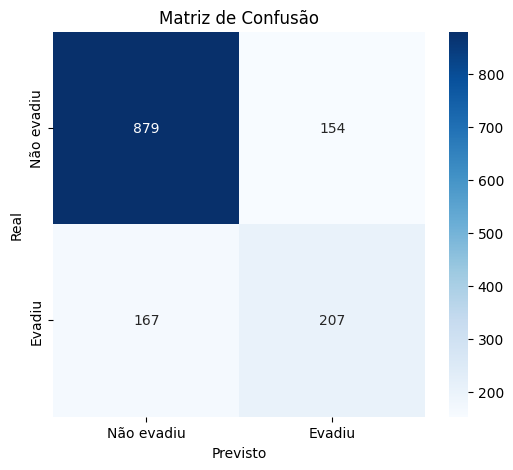

In [104]:
cm_teste_rf_ros = confusion_matrix(y_teste, y_teste_pred_rf_ros)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_teste_rf_ros, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Não evadiu", "Evadiu"],
            yticklabels=["Não evadiu", "Evadiu"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

### Regressão Logística - RandomOversampling

In [105]:
lr_ros = LogisticRegression(
                        random_state=42, # reproductibilidade
                        solver='liblinear', # bom para datasets pequenos
                        max_iter=1000 # permite alto número de iterações até encontrar a convergência
                        )

#### Treino

In [106]:
lr_ros.fit(X_treino_ros, y_treino_ros)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [107]:
print('Convergência do modelo:', lr_ros.n_iter_)

Convergência do modelo: [6]


In [108]:
coeficientes_ros = pd.DataFrame({'Variável': X.columns, 'Coeficiente': lr_ros.coef_[0]})
coeficientes_ros = coeficientes_ros.sort_values(by='Coeficiente', ascending=False)
print(coeficientes_ros)

                                   Variável  Coeficiente
7                              TotalCharges     1.739924
34                  Contract_Month-to-month     0.739552
14              InternetService_Fiber optic     0.478472
0                             SeniorCitizen     0.358273
39           PaymentMethod_Electronic check     0.329140
25                           TechSupport_No     0.275633
5                          PaperlessBilling     0.221006
16                        OnlineSecurity_No     0.207181
33                      StreamingMovies_Yes     0.203906
30                          StreamingTV_Yes     0.201897
11           MultipleLines_No phone service     0.145851
24                     DeviceProtection_Yes     0.118501
19                          OnlineBackup_No     0.083952
1                                   Partner     0.070092
9                               gender_Male     0.033486
21                         OnlineBackup_Yes     0.028028
12                        Multi

#### Validação

In [109]:
y_val_proba_lr_ros = lr_ros.predict_proba(X_val)[:, 1]
y_val_pred_lr_ros = lr_ros.predict(X_val)

acuracia_val_lr_ros = accuracy_score(y_val, y_val_pred_lr_ros)
precisao_val_lr_ros = precision_score(y_val, y_val_pred_lr_ros)
recall_val_lr_ros = recall_score(y_val, y_val_pred_lr_ros)
f1_val_lr_ros = f1_score(y_val, y_val_pred_lr_ros)
roc_auc_val_lr_ros = roc_auc_score(y_val, y_val_proba_lr_ros)

print("Acurácia na validação:", acuracia_val_lr_ros)
print("Precisão na validação:", precisao_val_lr_ros)
print("Recall na validação:", recall_val_lr_ros)
print("f1-Score na validação:", f1_val_lr_ros)
print("ROC AUC na validação:", roc_auc_val_lr_ros)

Acurácia na validação: 0.744136460554371
Precisão na validação: 0.5215311004784688
Recall na validação: 0.8449612403100775
f1-Score na validação: 0.6449704142011834
ROC AUC na validação: 0.8531185083852663


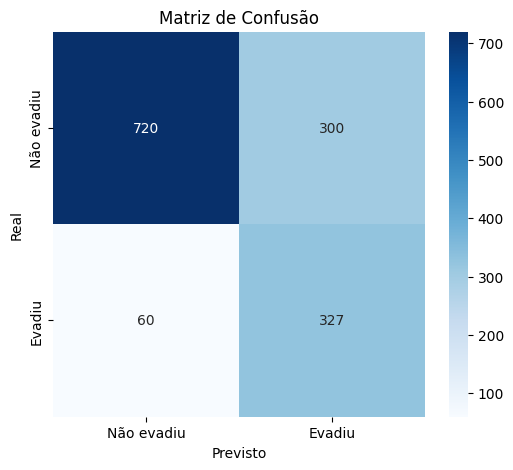

In [110]:
cm_val_lr_ros = confusion_matrix(y_val, y_val_pred_lr_ros)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_val_lr_ros, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Não evadiu", "Evadiu"],
            yticklabels=["Não evadiu", "Evadiu"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

#### Tuning dos hiperparâmetros

In [111]:
parametros = {
              'C': [0.001, 0.01, 0.1, 1, 10, 100], # inverso da força de regularização
              'penalty': ['l1', 'l2'], # penalidade aplicada
              'class_weight': ['balanced', None], # pesos associados às classes, 'balanced' ajusta os pesos de modo inversamente proporcional a frequência das classes
        }

grid_search_lr_ros = GridSearchCV(
                                lr_ros,
                                parametros,
                                cv=5, # validação cruzada com 5 fols
                                scoring='recall' # otimizando para recall
                              )
grid_search_lr_ros.fit(X_treino_ros, y_treino_ros)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, random_state=42,
                                          solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [112]:
print("Melhores hiperparâmetros:", grid_search_lr_ros.best_params_)
print("Melhor Recall na validação cruzada:", grid_search_lr_ros.best_score_)

Melhores hiperparâmetros: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1'}
Melhor Recall na validação cruzada: 0.8421221864951768


#### Teste

In [113]:
y_teste_proba_lr_ros = grid_search_lr_ros.predict_proba(X_teste)[:, 1]
y_teste_pred_lr_ros = grid_search_lr_ros.predict(X_teste)

acuracia_teste_lr_ros = accuracy_score(y_teste, y_teste_pred_lr_ros)
precisao_teste_lr_ros = precision_score(y_teste, y_teste_pred_lr_ros)
recall_teste_lr_ros = recall_score(y_teste, y_teste_pred_lr_ros)
f1_teste_lr_ros = f1_score(y_teste, y_teste_pred_lr_ros)
roc_auc_teste_lr_ros = roc_auc_score(y_teste, y_teste_proba_lr_ros)

print("Acurácia no teste:", acuracia_teste_lr_ros)
print("Precisão no teste:", precisao_teste_lr_ros)
print("Recall no teste:", recall_teste_lr_ros)
print("f1-Score no teste:", f1_teste_lr_ros)
print("ROC AUC no teste:", roc_auc_teste_lr_ros)

Acurácia no teste: 0.7100213219616205
Precisão no teste: 0.47392638036809814
Recall no teste: 0.8262032085561497
f1-Score no teste: 0.6023391812865497
ROC AUC no teste: 0.82803966433885


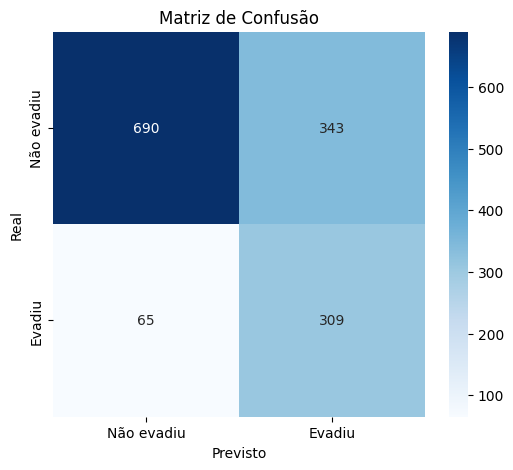

In [114]:
cm_teste_lr_ros = confusion_matrix(y_teste, y_teste_pred_lr_ros)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_teste_lr_ros, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Não evadiu", "Evadiu"],
            yticklabels=["Não evadiu", "Evadiu"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

## Random Undersampling

Esta técnica de reamostragem exclui aleatoriamente amostras da classe majoritária a fim de equilibrar as classes.

In [115]:
from imblearn.under_sampling import RandomUnderSampler

In [116]:
rus = RandomUnderSampler(random_state=42)
X_treino_rus, y_treino_rus = rus.fit_resample(X_treino, y_treino)

In [117]:
print(X_treino.shape)
print(X_treino_rus.shape)

(4218, 41)
(2216, 41)


In [118]:
print("Proporção Churn - Treino: ", y_treino_rus.mean())
print("Proporção Churn - Validação: ", y_val.mean())
print("Proporção Churn - Teste: ", y_teste.mean())

Proporção Churn - Treino:  0.5
Proporção Churn - Validação:  0.27505330490405117
Proporção Churn - Teste:  0.2658137882018479


### KNN - Random Undersampling


#### Treino

In [119]:
knn_rus = KNeighborsClassifier()

In [120]:
knn_rus.fit(X_treino_rus, y_treino_rus)

KNeighborsClassifier()

#### Validação

In [121]:
y_val_proba_knn_rus = knn_rus.predict_proba(X_val)[:, 1]
y_val_pred_knn_rus = knn_rus.predict(X_val)

acuracia_val_knn_rus = accuracy_score(y_val, y_val_pred_knn_rus)
precisao_val_knn_rus = precision_score(y_val, y_val_pred_knn_rus)
recall_val_knn_rus = recall_score(y_val, y_val_pred_knn_rus)
f1_val_knn_rus = f1_score(y_val, y_val_pred_knn_rus)
roc_auc_val_knn_rus = roc_auc_score(y_val, y_val_proba_knn_rus)

print("Acurácia na validação:", acuracia_val_knn_rus)
print("Precisão na validação:", precisao_val_knn_rus)
print("Recall na validação:", recall_val_knn_rus)
print("f1-Score na validação:", f1_val_knn_rus)
print("ROC AUC na validação:", roc_auc_val_knn_rus)

Acurácia na validação: 0.6936744847192609
Precisão na validação: 0.4678362573099415
Recall na validação: 0.8268733850129198
f1-Score na validação: 0.5975723622782446
ROC AUC na validação: 0.7918325986725439


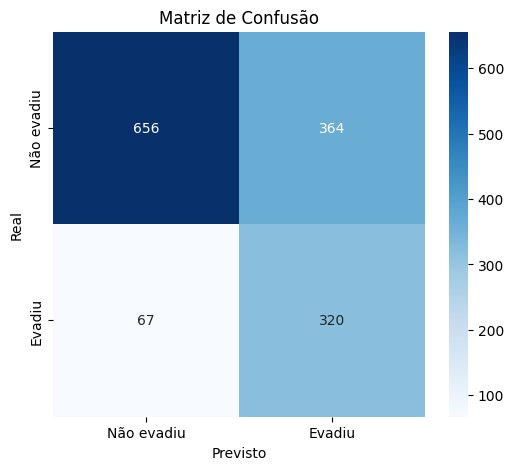

In [122]:
cm_val_knn_rus = confusion_matrix(y_val, y_val_pred_knn_rus)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_val_knn_rus, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Não evadiu", "Evadiu"],
            yticklabels=["Não evadiu", "Evadiu"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

#### Tuning dos hiperparâmetros

In [123]:
n_neighbors = list(range(5, 83, 2)) # números impares de 5 ate 83
weights = ['uniform', 'distance']
algorithm= ['auto']
leaf_size= [30]
p= [2, 1]
metric=['minkowski', 'manhattan']
n_jobs= [-1]

parametros = {
              'n_neighbors': n_neighbors,
               'weights': weights,
               'algorithm': algorithm,
               'leaf_size': leaf_size,
               'p': p,
               'metric': metric,
               'n_jobs': n_jobs
        }

grid_search_knn_rus = GridSearchCV(
                                knn_rus,
                                parametros,
                                cv=5, # validação cruzada com 5 folds
                                scoring='recall' # otimizando para recall
                                )
grid_search_knn_rus.fit(X_treino_rus, y_treino_rus)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto'], 'leaf_size': [30],
                         'metric': ['minkowski', 'manhattan'], 'n_jobs': [-1],
                         'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29, 31, 33, 35, 37, 39, 41, 43,
                                         45, 47, 49, 51, 53, 55, 57, 59, 61, 63, ...],
                         'p': [2, 1], 'weights': ['uniform', 'distance']},
             scoring='recall')

In [124]:
print("Melhores hiperparâmetros:", grid_search_knn_rus.best_params_)
print("Melhor Recall na validação cruzada:", grid_search_knn_rus.best_score_)

Melhores hiperparâmetros: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_jobs': -1, 'n_neighbors': 73, 'p': 2, 'weights': 'distance'}
Melhor Recall na validação cruzada: 0.8628062451591865


#### Teste

In [125]:
y_teste_rus_proba_knn = grid_search_knn_rus.predict_proba(X_teste)[:, 1]
y_teste_pred_knn_rus = grid_search_knn_rus.predict(X_teste)

acuracia_teste_knn_rus = accuracy_score(y_teste, y_teste_pred_knn_rus)
precisao_teste_knn_rus = precision_score(y_teste, y_teste_pred_knn_rus)
recall_teste_knn_rus = recall_score(y_teste, y_teste_pred_knn_rus)
f1_teste_knn_rus = f1_score(y_teste, y_teste_pred_knn_rus)
roc_auc_teste_knn_rus = roc_auc_score(y_teste, y_teste_proba_knn)

print("Acurácia no teste:", acuracia_teste_knn_rus)
print("Precisão no teste:", precisao_teste_knn_rus)
print("Recall no teste:", recall_teste_knn_rus)
print("f1-Score no teste:", f1_teste_knn_rus)
print("ROC AUC no teste:", roc_auc_teste_knn_rus)

Acurácia no teste: 0.6695095948827292
Precisão no teste: 0.4380952380952381
Recall no teste: 0.8609625668449198
f1-Score no teste: 0.5807033363390441
ROC AUC no teste: 0.8151301178748364


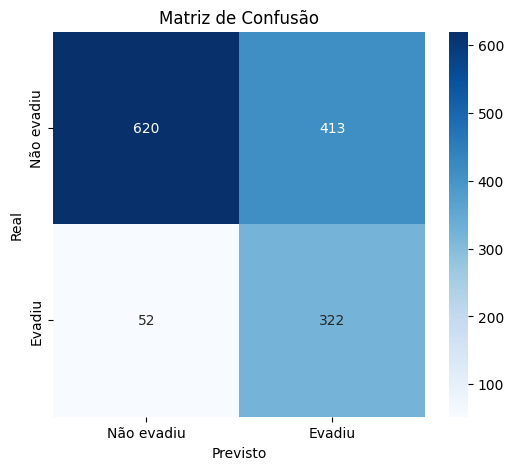

In [126]:
cm_teste_knn_rus = confusion_matrix(y_teste, y_teste_pred_knn_rus)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_teste_knn_rus, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Não evadiu", "Evadiu"],
            yticklabels=["Não evadiu", "Evadiu"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

### Random Forest - Random Undersampling

In [127]:
rf_rus = RandomForestClassifier(random_state=42)

#### Treino

In [128]:
rf_rus.fit(X_treino_rus, y_treino_rus)

RandomForestClassifier(random_state=42)

#### Validação

In [129]:
y_val_proba_rf_rus = rf_rus.predict_proba(X_val)[:, 1]
y_val_pred_rf_rus = rf_rus.predict(X_val)

acuracia_val_rf_rus = accuracy_score(y_val, y_val_pred_rf_rus)
precisao_val_rf_rus = precision_score(y_val, y_val_pred_rf_rus)
recall_val_rf_rus = recall_score(y_val, y_val_pred_rf_rus)
f1_val_rf_rus = f1_score(y_val, y_val_pred_rf_rus)
roc_auc_val_rf_rus = roc_auc_score(y_val, y_val_proba_rf_rus)

print("Acurácia na validação:", acuracia_val_rf_rus)
print("Precisão na validação:", precisao_val_rf_rus)
print("Recall na validação:", recall_val_rf_rus)
print("f1-Score na validação:", f1_val_rf_rus)
print("ROC AUC na validação:", roc_auc_val_rf_rus)

Acurácia na validação: 0.7398720682302772
Precisão na validação: 0.5173553719008265
Recall na validação: 0.8087855297157622
f1-Score na validação: 0.6310483870967742
ROC AUC na validação: 0.8308405532755738


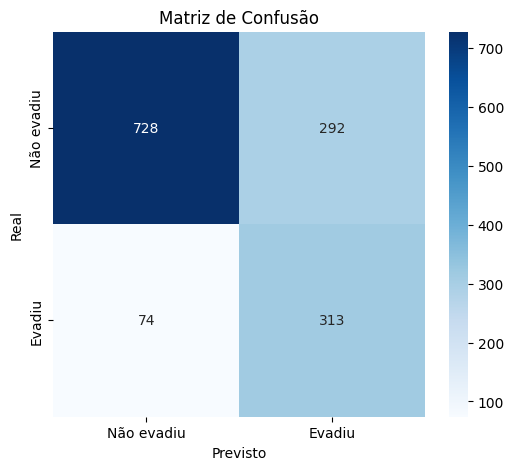

In [130]:
cm_val_rf_rus = confusion_matrix(y_val, y_val_pred_rf_rus)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_val_rf_rus, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Não evadiu", "Evadiu"],
            yticklabels=["Não evadiu", "Evadiu"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

#### Tuning dos hiperparâmetros

In [131]:
# Numero de arvores em floresta aleatoria
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 100)]
# Numero de features a serem consideradas em cada splita
max_features = ['log2', 'sqrt']
# Profundidade maxima da arvore
max_depth = [1, 6, 11, 16, 21, None]
# Numero minimo de amostras para separar um nó
min_samples_split = [2, 5, 10]
# Numero minimo de amostras para cada nó de folha
min_samples_leaf = [1, 2, 4]

parametros = {
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }

random_search_rf_rus = RandomizedSearchCV(rf_rus, parametros, cv=5, scoring='recall', n_jobs=-1, random_state=42)
random_search_rf_rus.fit(X_treino_rus, y_treino_rus)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 6, 11, 16, 21, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 109, 118, 127,
                                                         136, 145, 154, 163,
                                                         172, 181, 190, 200,
                                                         209, 218, 227, 236,
                                                         245, 254, 263, 272,
                                                         281, 290, 300, 309,
                                                         318, 327, 336, 345,
                                                         354, 363, ...]},
                   random_state=42, scoring='recall')

In [132]:
print("Melhores hiperparâmetros:", random_search_rf_rus.best_params_)
print("Melhor Recall na validação cruzada:", random_search_rf_rus.best_score_)

Melhores hiperparâmetros: {'n_estimators': 645, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 1}
Melhor Recall na validação cruzada: 0.8266968325791856


#### Teste

In [133]:
y_teste_proba_rf_rus = random_search_rf_rus.predict_proba(X_teste)[:, 1]
y_teste_pred_rf_rus = random_search_rf_rus.predict(X_teste)

acuracia_teste_rf_rus = accuracy_score(y_teste, y_teste_pred_rf_rus)
precisao_teste_rf_rus = precision_score(y_teste, y_teste_pred_rf_rus)
recall_teste_rf_rus = recall_score(y_teste, y_teste_pred_rf_rus)
f1_teste_rf_rus = f1_score(y_teste, y_teste_pred_rf_rus)
roc_auc_teste_rf_rus = roc_auc_score(y_teste, y_teste_proba_rf_rus)

print("Acurácia no teste:", acuracia_teste_rf_rus)
print("Precisão no teste:", precisao_teste_rf_rus)
print("Recall no teste:", recall_teste_rf_rus)
print("f1-Score no teste:", f1_teste_rf_rus)
print("ROC AUC no teste:", roc_auc_teste_rf_rus)

Acurácia no teste: 0.6958066808813077
Precisão no teste: 0.46017699115044247
Recall no teste: 0.8342245989304813
f1-Score no teste: 0.5931558935361216
ROC AUC no teste: 0.8197154334760395


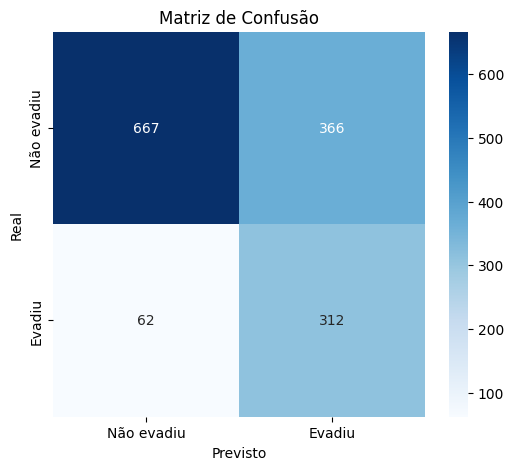

In [134]:
cm_teste_rf_rus = confusion_matrix(y_teste, y_teste_pred_rf_rus)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_teste_rf_rus, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Não evadiu", "Evadiu"],
            yticklabels=["Não evadiu", "Evadiu"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

### Regressão Logística - RandomOversampling

In [135]:
lr_rus = LogisticRegression(
                        random_state=42, # reproductibilidade
                        solver='liblinear', # bom para datasets pequenos
                        max_iter=1000 # permite alto número de iterações até encontrar a convergência
                        )

#### Treino

In [136]:
lr_rus.fit(X_treino_rus, y_treino_rus)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [137]:
print('Convergência do modelo:', lr_rus.n_iter_)

Convergência do modelo: [6]


In [138]:
coeficientes_rus = pd.DataFrame({'Variável': X.columns, 'Coeficiente': lr_rus.coef_[0]})
coeficientes_rus = coeficientes_rus.sort_values(by='Coeficiente', ascending=False)
print(coeficientes_rus)

                                   Variável  Coeficiente
7                              TotalCharges     0.983877
34                  Contract_Month-to-month     0.681074
14              InternetService_Fiber optic     0.495244
0                             SeniorCitizen     0.318719
25                           TechSupport_No     0.281315
39           PaymentMethod_Electronic check     0.263638
5                          PaperlessBilling     0.258901
30                          StreamingTV_Yes     0.176695
16                        OnlineSecurity_No     0.172628
11           MultipleLines_No phone service     0.163827
33                      StreamingMovies_Yes     0.136220
19                          OnlineBackup_No     0.093256
24                     DeviceProtection_Yes     0.087875
12                        MultipleLines_Yes     0.027450
22                      DeviceProtection_No     0.021015
21                         OnlineBackup_Yes     0.015634
9                              

#### Validação

In [139]:
y_val_proba_lr_rus = lr_rus.predict_proba(X_val)[:, 1]
y_val_pred_lr_rus = lr_rus.predict(X_val)

acuracia_val_lr_rus = accuracy_score(y_val, y_val_pred_lr_rus)
precisao_val_lr_rus = precision_score(y_val, y_val_pred_lr_rus)
recall_val_lr_rus = recall_score(y_val, y_val_pred_lr_rus)
f1_val_lr_rus = f1_score(y_val, y_val_pred_lr_rus)
roc_auc_val_lr_rus = roc_auc_score(y_val, y_val_proba_lr_rus)

print("Acurácia na validação:", acuracia_val_lr_rus)
print("Precisão na validação:", precisao_val_lr_rus)
print("Recall na validação:", recall_val_lr_rus)
print("f1-Score na validação:", f1_val_lr_rus)
print("ROC AUC na validação:", roc_auc_val_lr_rus)

Acurácia na validação: 0.7555081734186212
Precisão na validação: 0.5349593495934959
Recall na validação: 0.8501291989664083
f1-Score na validação: 0.656686626746507
ROC AUC na validação: 0.8529487764097887


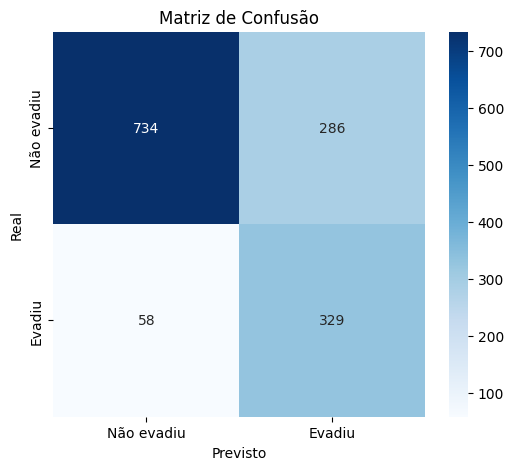

In [140]:
cm_val_lr_rus = confusion_matrix(y_val, y_val_pred_lr_rus)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_val_lr_rus, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Não evadiu", "Evadiu"],
            yticklabels=["Não evadiu", "Evadiu"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

#### Tuning dos hiperparâmetros

In [141]:
parametros = {
              'C': [0.001, 0.01, 0.1, 1, 10, 100], # inverso da força de regularização
              'penalty': ['l1', 'l2'], # penalidade aplicada
              'class_weight': ['balanced', None], # pesos associados às classes, 'balanced' ajusta os pesos de modo inversamente proporcional a frequência das classes
        }

grid_search_lr_rus = GridSearchCV(
                                lr_rus,
                                parametros,
                                cv=5, # validação cruzada com 5 fols
                                scoring='recall' # otimizando para recall
                              )
grid_search_lr_rus.fit(X_treino_rus, y_treino_rus)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, random_state=42,
                                          solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [142]:
print("Melhores hiperparâmetros:", grid_search_lr_rus.best_params_)
print("Melhor Recall na validação cruzada:", grid_search_lr_rus.best_score_)

Melhores hiperparâmetros: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1'}
Melhor Recall na validação cruzada: 0.8889894419306185


#### Teste

In [143]:
y_teste_proba_lr_rus = grid_search_lr_rus.predict_proba(X_teste)[:, 1]
y_teste_pred_lr_rus = grid_search_lr_rus.predict(X_teste)

acuracia_teste_lr_rus = accuracy_score(y_teste, y_teste_pred_lr_rus)
precisao_teste_lr_rus = precision_score(y_teste, y_teste_pred_lr_rus)
recall_teste_lr_rus = recall_score(y_teste, y_teste_pred_lr_rus)
f1_teste_lr_rus = f1_score(y_teste, y_teste_pred_lr_rus)
roc_auc_teste_lr_rus = roc_auc_score(y_teste, y_teste_proba_lr_rus)

print("Acurácia no teste:", acuracia_teste_lr_rus)
print("Precisão no teste:", precisao_teste_lr_rus)
print("Recall no teste:", recall_teste_lr_rus)
print("f1-Score no teste:", f1_teste_lr_rus)
print("ROC AUC no teste:", roc_auc_teste_lr_rus)

Acurácia no teste: 0.660270078180526
Precisão no teste: 0.4308510638297872
Recall no teste: 0.8663101604278075
f1-Score no teste: 0.5754884547069272
ROC AUC no teste: 0.8177314400194646


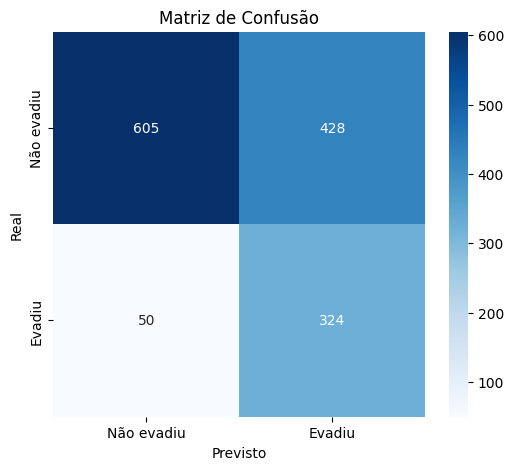

In [144]:
cm_teste_lr_rus = confusion_matrix(y_teste, y_teste_pred_lr_rus)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_teste_lr_rus, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Não evadiu", "Evadiu"],
            yticklabels=["Não evadiu", "Evadiu"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

## SMOTE

In [145]:
from imblearn.over_sampling import SMOTE

In [146]:
sm = SMOTE(random_state=42)
smoted_X_treino, smoted_y_treino = sm.fit_resample(X_treino, y_treino)
X_treino.shape

(4218, 41)

In [147]:
smoted_X_treino.shape


(6220, 41)

### KNN - SMOTE

In [148]:
knn.fit(smoted_X_treino, smoted_y_treino)

KNeighborsClassifier()

#### Validação

In [149]:
y_val_proba_knn = knn.predict_proba(X_val)[:, 1]
y_val_pred_knn = knn.predict(X_val)

acuracia_val_knn = accuracy_score(y_val, y_val_pred_knn)
precisao_val_knn = precision_score(y_val, y_val_pred_knn)
recall_val_knn = recall_score(y_val, y_val_pred_knn)
f1_val_knn = f1_score(y_val, y_val_pred_knn)
roc_auc_val_knn = roc_auc_score(y_val, y_val_proba_knn)

print("Acurácia na validação:", acuracia_val_knn)
print("Precisão na validação:", precisao_val_knn)
print("Recall na validação:", recall_val_knn)
print("f1-Score na validação:", f1_val_knn)
print("ROC AUC na validação:", roc_auc_val_knn)

Acurácia na validação: 0.6922530206112296
Precisão na validação: 0.4624183006535948
Recall na validação: 0.7312661498708011
f1-Score na validação: 0.5665665665665666
ROC AUC na validação: 0.757235142118863


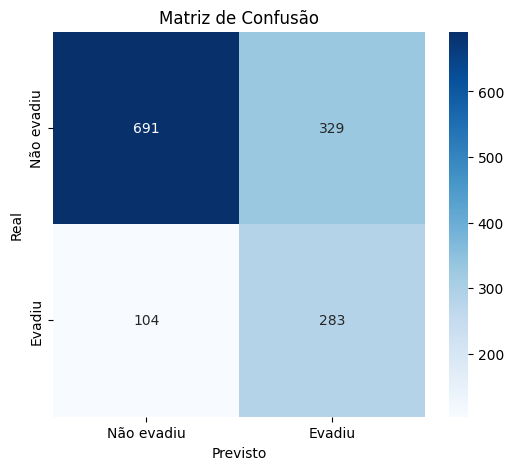

In [150]:
cm_val_knn = confusion_matrix(y_val, y_val_pred_knn)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_val_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Não evadiu", "Evadiu"],
            yticklabels=["Não evadiu", "Evadiu"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

#### Hyperparameter tuning

In [151]:
n_neighbors = list(range(5, 83, 2)) # números impares de 5 ate 83
weights = ['uniform', 'distance']
algorithm= ['auto']
leaf_size= [30]
p= [2, 1]
metric=['minkowski', 'manhattan']
n_jobs= [-1]

parametros = {
              'n_neighbors': n_neighbors,
               'weights': weights,
               'algorithm': algorithm,
               'leaf_size': leaf_size,
               'p': p,
               'metric': metric,
               'n_jobs': n_jobs
        }

grid_search_knn = GridSearchCV(
                                knn,
                                parametros,
                                cv=5, # validação cruzada com 5 folds
                                scoring='recall' # otimizando para recall
                                )
grid_search_knn.fit(smoted_X_treino, smoted_y_treino)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto'], 'leaf_size': [30],
                         'metric': ['minkowski', 'manhattan'], 'n_jobs': [-1],
                         'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29, 31, 33, 35, 37, 39, 41, 43,
                                         45, 47, 49, 51, 53, 55, 57, 59, 61, 63, ...],
                         'p': [2, 1], 'weights': ['uniform', 'distance']},
             scoring='recall')

In [152]:
print("Melhores hiperparâmetros:", grid_search_knn.best_params_)
print("Melhor Recall na validação cruzada:", grid_search_knn.best_score_)

Melhores hiperparâmetros: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_jobs': -1, 'n_neighbors': 13, 'p': 2, 'weights': 'distance'}
Melhor Recall na validação cruzada: 0.9218649517684888


#### Teste

In [153]:
y_teste_proba_knn = grid_search_knn.predict_proba(X_teste)[:, 1]
y_teste_pred_knn = grid_search_knn.predict(X_teste)

acuracia_teste_knn = accuracy_score(y_teste, y_teste_pred_knn)
precisao_teste_knn = precision_score(y_teste, y_teste_pred_knn)
recall_teste_knn = recall_score(y_teste, y_teste_pred_knn)
f1_teste_knn = f1_score(y_teste, y_teste_pred_knn)
roc_auc_teste_knn = roc_auc_score(y_teste, y_teste_proba_knn)

print("Acurácia no teste:", acuracia_teste_knn)
print("Precisão no teste:", precisao_teste_knn)
print("Recall no teste:", recall_teste_knn)
print("f1-Score no teste:", f1_teste_knn)
print("ROC AUC no teste:", roc_auc_teste_knn)

Acurácia no teste: 0.6851457000710732
Precisão no teste: 0.44390243902439025
Recall no teste: 0.7299465240641712
f1-Score no teste: 0.5520728008088979
ROC AUC no teste: 0.7518856350073251


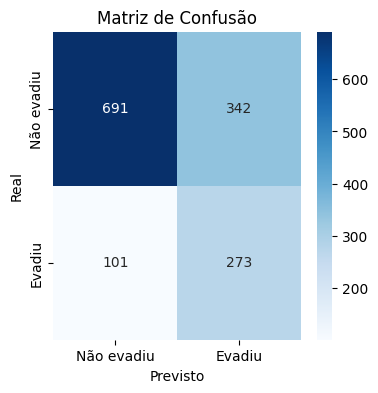

In [154]:
cm_teste_knn = confusion_matrix(y_teste, y_teste_pred_knn)

plt.figure(figsize=(4, 4))
sns.heatmap(cm_teste_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Não evadiu", "Evadiu"],
            yticklabels=["Não evadiu", "Evadiu"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

### Random Forest - SMOTE

In [155]:
rf.fit(smoted_X_treino, smoted_y_treino)

RandomForestClassifier(random_state=42)

#### Validação

In [156]:
y_val_proba_rf = rf.predict_proba(X_val)[:, 1]
y_val_pred_rf = rf.predict(X_val)

acuracia_val_rf = accuracy_score(y_val, y_val_pred_rf)
precisao_val_rf = precision_score(y_val, y_val_pred_rf)
recall_val_rf = recall_score(y_val, y_val_pred_rf)
f1_val_rf = f1_score(y_val, y_val_pred_rf)
roc_auc_val_rf = roc_auc_score(y_val, y_val_proba_rf)

print("Acurácia na validação:", acuracia_val_rf)
print("Precisão na validação:", precisao_val_rf)
print("Recall na validação:", recall_val_rf)
print("f1-Score na validação:", f1_val_rf)
print("ROC AUC na validação:", roc_auc_val_rf)

Acurácia na validação: 0.783226723525231
Precisão na validação: 0.6108108108108108
Recall na validação: 0.5839793281653747
f1-Score na validação: 0.5970937912813739
ROC AUC na validação: 0.8270709834321327


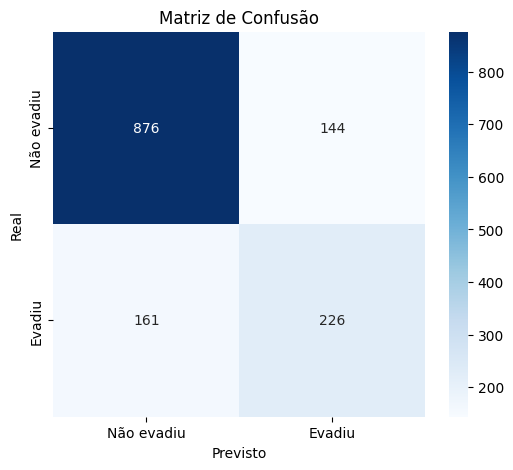

In [157]:
cm_val_rf = confusion_matrix(y_val, y_val_pred_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_val_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Não evadiu", "Evadiu"],
            yticklabels=["Não evadiu", "Evadiu"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

#### Hyperparameter tuning

In [158]:
# Numero de arvores em floresta aleatoria
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 100)]
# Numero de features a serem consideradas em cada splita
max_features = ['log2', 'sqrt']
# Profundidade maxima da arvore
max_depth = [1, 6, 11, 16, 21, None]
# Numero minimo de amostras para separar um nó
min_samples_split = [2, 5, 10]
# Numero minimo de amostras para cada nó de folha
min_samples_leaf = [1, 2, 4]

parametros = {
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }

random_search_rf = RandomizedSearchCV(rf, parametros, cv=5, scoring='recall', n_jobs=-1, random_state=42)
random_search_rf.fit(smoted_X_treino, smoted_y_treino)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 6, 11, 16, 21, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 109, 118, 127,
                                                         136, 145, 154, 163,
                                                         172, 181, 190, 200,
                                                         209, 218, 227, 236,
                                                         245, 254, 263, 272,
                                                         281, 290, 300, 309,
                                                         318, 327, 336, 345,
                                                         354, 363, ...]},
                   random_state=42, scoring='recall')

In [159]:
print("Melhores hiperparâmetros:", random_search_rf.best_params_)
print("Melhor Recall na validação cruzada:", random_search_rf.best_score_)

Melhores hiperparâmetros: {'n_estimators': 736, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 21}
Melhor Recall na validação cruzada: 0.8665594855305466


#### Teste

In [160]:
y_teste_proba_rf = random_search_rf.predict_proba(X_teste)[:, 1]
y_teste_pred_rf = random_search_rf.predict(X_teste)

acuracia_teste_rf = accuracy_score(y_teste, y_teste_pred_rf)
precisao_teste_rf = precision_score(y_teste, y_teste_pred_rf)
recall_teste_rf = recall_score(y_teste, y_teste_pred_rf)
f1_teste_rf = f1_score(y_teste, y_teste_pred_rf)
roc_auc_teste_rf = roc_auc_score(y_teste, y_teste_proba_rf)

print("Acurácia no teste:", acuracia_teste_rf)
print("Precisão no teste:", precisao_teste_rf)
print("Recall no teste:", recall_teste_rf)
print("f1-Score no teste:", f1_teste_rf)
print("ROC AUC no teste:", roc_auc_teste_rf)

Acurácia no teste: 0.7732764747690121
Precisão no teste: 0.5721784776902887
Recall no teste: 0.5828877005347594
f1-Score no teste: 0.5774834437086093
ROC AUC no teste: 0.8145153775670262


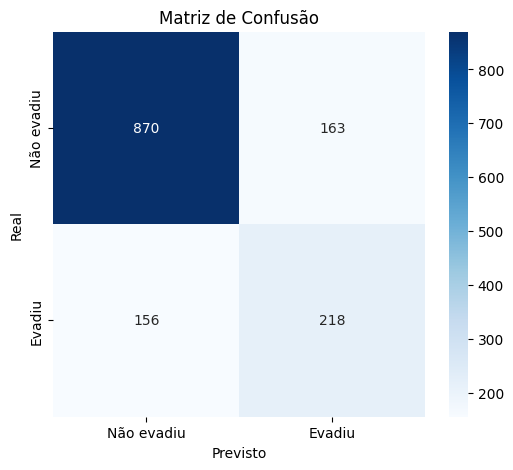

In [161]:
cm_teste_rf = confusion_matrix(y_teste, y_teste_pred_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_teste_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Não evadiu", "Evadiu"],
            yticklabels=["Não evadiu", "Evadiu"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

### Regressão Logística - SMOTE

#### Validação

In [162]:
lr.fit(smoted_X_treino, smoted_y_treino)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [163]:
y_val_proba_lr = lr.predict_proba(X_val)[:, 1]
y_val_pred_lr = lr.predict(X_val)

acuracia_val_lr = accuracy_score(y_val, y_val_pred_lr)
precisao_val_lr = precision_score(y_val, y_val_pred_lr)
recall_val_lr = recall_score(y_val, y_val_pred_lr)
f1_val_lr = f1_score(y_val, y_val_pred_lr)
roc_auc_val_lr = roc_auc_score(y_val, y_val_proba_lr)

print("Acurácia na validação:", acuracia_val_lr)
print("Precisão na validação:", precisao_val_lr)
print("Recall na validação:", recall_val_lr)
print("f1-Score na validação:", f1_val_lr)
print("ROC AUC na validação:", roc_auc_val_lr)

Acurácia na validação: 0.749822316986496
Precisão na validação: 0.528830313014827
Recall na validação: 0.8294573643410853
f1-Score na validação: 0.6458752515090543
ROC AUC na validação: 0.8517961189643816


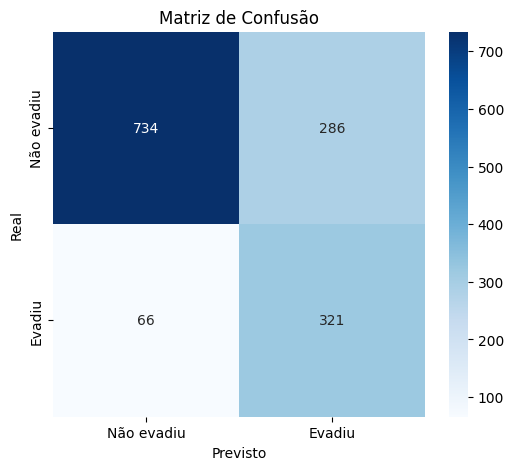

In [164]:
cm_val_lr = confusion_matrix(y_val, y_val_pred_lr)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_val_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Não evadiu", "Evadiu"],
            yticklabels=["Não evadiu", "Evadiu"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

#### Hyperparameter tuning

In [165]:
parametros = {
              'C': [0.001, 0.01, 0.1, 1, 10, 100], # inverso da força de regularização
              'penalty': ['l1', 'l2'], # penalidade aplicada
              'class_weight': ['balanced', None], # pesos associados às classes, 'balanced' ajusta os pesos de modo inversamente proporcional a frequência das classes
        }

grid_search_lr = GridSearchCV(
                                lr,
                                parametros,
                                cv=5, # validação cruzada com 5 fols
                                scoring='recall' # otimizando para recall
                              )
grid_search_lr.fit(smoted_X_treino, smoted_y_treino)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, random_state=42,
                                          solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [166]:
print("Melhores hiperparâmetros:", grid_search_lr.best_params_)
print("Melhor Recall na validação cruzada:", grid_search_lr.best_score_)

Melhores hiperparâmetros: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1'}
Melhor Recall na validação cruzada: 0.8382636655948552


#### Teste

In [167]:
y_teste_proba_lr = grid_search_lr.predict_proba(X_teste)[:, 1]
y_teste_pred_lr = grid_search_lr.predict(X_teste)

acuracia_teste_lr = accuracy_score(y_teste, y_teste_pred_lr)
precisao_teste_lr = precision_score(y_teste, y_teste_pred_lr)
recall_teste_lr = recall_score(y_teste, y_teste_pred_lr)
f1_teste_lr = f1_score(y_teste, y_teste_pred_lr)
roc_auc_teste_lr = roc_auc_score(y_teste, y_teste_proba_lr)

print("Acurácia no teste:", acuracia_teste_lr)
print("Precisão no teste:", precisao_teste_lr)
print("Recall no teste:", recall_teste_lr)
print("f1-Score no teste:", f1_teste_lr)
print("ROC AUC no teste:", roc_auc_teste_lr)

Acurácia no teste: 0.7306325515280739
Precisão no teste: 0.4957983193277311
Recall no teste: 0.7887700534759359
f1-Score no teste: 0.608875128998968
ROC AUC no teste: 0.8270534914661103


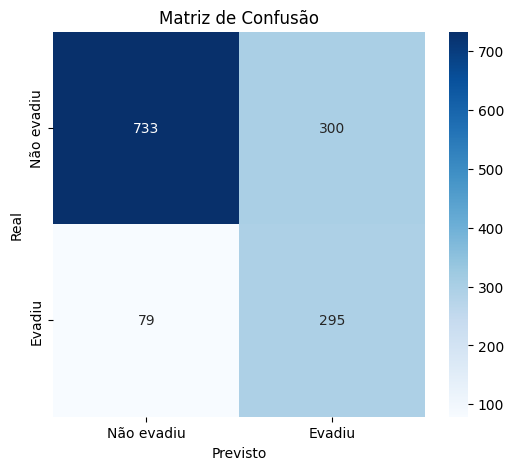

In [168]:
cm_teste_lr = confusion_matrix(y_teste, y_teste_pred_lr)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_teste_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Não evadiu", "Evadiu"],
            yticklabels=["Não evadiu", "Evadiu"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

Aplicamos o smote, mas isso diminuiu o nosso recall

##SMOTEENN

 Esta técnica utiliza primeiramente o SMOTE para gerar novas amostras sintéticas e, após isso, usa o ENN (Edit Nearest Neighbors), que remove amostras quando seus vizinhos mais próximos são de outra classe.

In [179]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

In [190]:
smenn = SMOTEENN(random_state=42, smote=SMOTE(random_state=42))
X_treino_smenn, y_treino_smenn = smenn.fit_resample(X_treino, y_treino)
print(X_treino.shape)
print(X_treino_smenn.shape)

(4218, 41)
(3900, 41)


In [192]:
print(y_treino_smenn.mean())

0.5664102564102564


### KNN - SMOTEENN


#### Treino

In [185]:
knn_smenn = KNeighborsClassifier()

In [193]:
knn_smenn.fit(X_treino_smenn, y_treino_smenn)

KNeighborsClassifier()

#### Validação

In [194]:
y_val_proba_knn_smenn = knn_smenn.predict_proba(X_val)[:, 1]
y_val_pred_knn_smenn = knn_smenn.predict(X_val)

acuracia_val_knn_smenn = accuracy_score(y_val, y_val_pred_knn_smenn)
precisao_val_knn_smenn = precision_score(y_val, y_val_pred_knn_smenn)
recall_val_knn_smenn = recall_score(y_val, y_val_pred_knn_smenn)
f1_val_knn_smenn = f1_score(y_val, y_val_pred_knn_smenn)
roc_auc_val_knn_smenn = roc_auc_score(y_val, y_val_proba_knn_smenn)

print("Acurácia na validação:", acuracia_val_knn_smenn)
print("Precisão na validação:", precisao_val_knn_smenn)
print("Recall na validação:", recall_val_knn_smenn)
print("f1-Score na validação:", f1_val_knn_smenn)
print("ROC AUC na validação:", roc_auc_val_knn_smenn)

Acurácia na validação: 0.6716417910447762
Precisão na validação: 0.4505928853754941
Recall na validação: 0.8837209302325582
f1-Score na validação: 0.5968586387434555
ROC AUC na validação: 0.7846164564016821


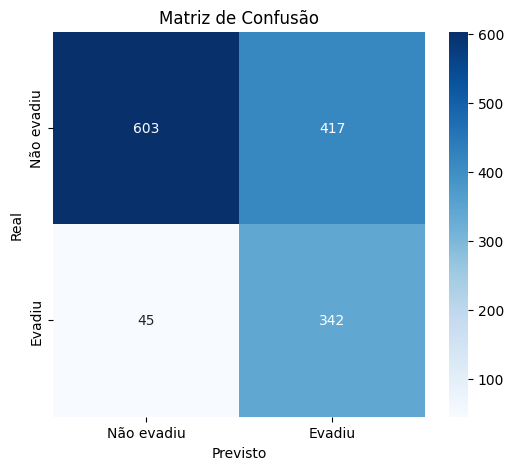

In [195]:
cm_val_knn_smenn = confusion_matrix(y_val, y_val_pred_knn_smenn)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_val_knn_smenn, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Não evadiu", "Evadiu"],
            yticklabels=["Não evadiu", "Evadiu"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

#### Tuning dos hiperparâmetros

In [196]:
n_neighbors = list(range(5, 83, 2)) # números impares de 5 ate 83
weights = ['uniform', 'distance']
algorithm= ['auto']
leaf_size= [30]
p= [2, 1]
metric=['minkowski', 'manhattan']
n_jobs= [-1]

parametros = {
              'n_neighbors': n_neighbors,
               'weights': weights,
               'algorithm': algorithm,
               'leaf_size': leaf_size,
               'p': p,
               'metric': metric,
               'n_jobs': n_jobs
        }

grid_search_knn_smenn = GridSearchCV(
                                knn_smenn,
                                parametros,
                                cv=5, # validação cruzada com 5 folds
                                scoring='recall' # otimizando para recall
                                )
grid_search_knn_smenn.fit(X_treino_smenn, y_treino_smenn)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto'], 'leaf_size': [30],
                         'metric': ['minkowski', 'manhattan'], 'n_jobs': [-1],
                         'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29, 31, 33, 35, 37, 39, 41, 43,
                                         45, 47, 49, 51, 53, 55, 57, 59, 61, 63, ...],
                         'p': [2, 1], 'weights': ['uniform', 'distance']},
             scoring='recall')

In [197]:
print("Melhores hiperparâmetros:", grid_search_knn_smenn.best_params_)
print("Melhor Recall na validação cruzada:", grid_search_knn_smenn.best_score_)

Melhores hiperparâmetros: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_jobs': -1, 'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
Melhor Recall na validação cruzada: 0.995021598382943


#### Teste

In [198]:
y_teste_smenn_proba_knn = grid_search_knn_smenn.predict_proba(X_teste)[:, 1]
y_teste_pred_knn_smenn = grid_search_knn_smenn.predict(X_teste)

acuracia_teste_knn_smenn = accuracy_score(y_teste, y_teste_pred_knn_smenn)
precisao_teste_knn_smenn = precision_score(y_teste, y_teste_pred_knn_smenn)
recall_teste_knn_smenn = recall_score(y_teste, y_teste_pred_knn_smenn)
f1_teste_knn_smenn = f1_score(y_teste, y_teste_pred_knn_smenn)
roc_auc_teste_knn_smenn = roc_auc_score(y_teste, y_teste_proba_knn)

print("Acurácia no teste:", acuracia_teste_knn_smenn)
print("Precisão no teste:", precisao_teste_knn_smenn)
print("Recall no teste:", recall_teste_knn_smenn)
print("f1-Score no teste:", f1_teste_knn_smenn)
print("ROC AUC no teste:", roc_auc_teste_knn_smenn)

Acurácia no teste: 0.6467661691542289
Precisão no teste: 0.42105263157894735
Recall no teste: 0.8770053475935828
f1-Score no teste: 0.5689505637467476
ROC AUC no teste: 0.7518856350073251


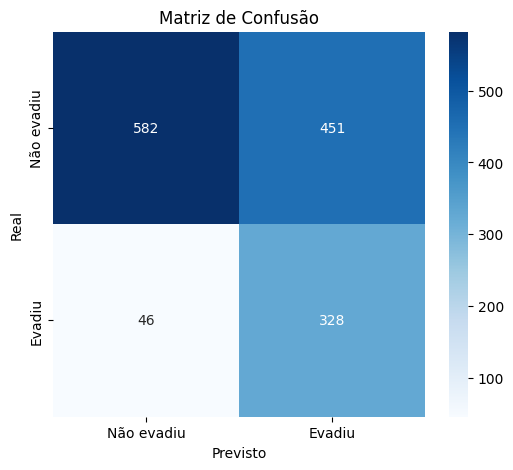

In [199]:
cm_teste_knn_smenn = confusion_matrix(y_teste, y_teste_pred_knn_smenn)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_teste_knn_smenn, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Não evadiu", "Evadiu"],
            yticklabels=["Não evadiu", "Evadiu"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

### Random Forest - SMOTEENN

In [200]:
rf_smenn = RandomForestClassifier(random_state=42)

#### Treino

In [201]:
rf_smenn.fit(X_treino_smenn, y_treino_smenn)

RandomForestClassifier(random_state=42)

#### Validação

In [202]:
y_val_proba_rf_smenn = rf_smenn.predict_proba(X_val)[:, 1]
y_val_pred_rf_smenn = rf_smenn.predict(X_val)

acuracia_val_rf_smenn = accuracy_score(y_val, y_val_pred_rf_smenn)
precisao_val_rf_smenn = precision_score(y_val, y_val_pred_rf_smenn)
recall_val_rf_smenn = recall_score(y_val, y_val_pred_rf_smenn)
f1_val_rf_smenn = f1_score(y_val, y_val_pred_rf_smenn)
roc_auc_val_rf_smenn = roc_auc_score(y_val, y_val_proba_rf_smenn)

print("Acurácia na validação:", acuracia_val_rf_smenn)
print("Precisão na validação:", precisao_val_rf_smenn)
print("Recall na validação:", recall_val_rf_smenn)
print("f1-Score na validação:", f1_val_rf_smenn)
print("ROC AUC na validação:", roc_auc_val_rf_smenn)

Acurácia na validação: 0.7370291400142146
Precisão na validação: 0.5135135135135135
Recall na validação: 0.834625322997416
f1-Score na validação: 0.6358267716535433
ROC AUC na validação: 0.841230936819172


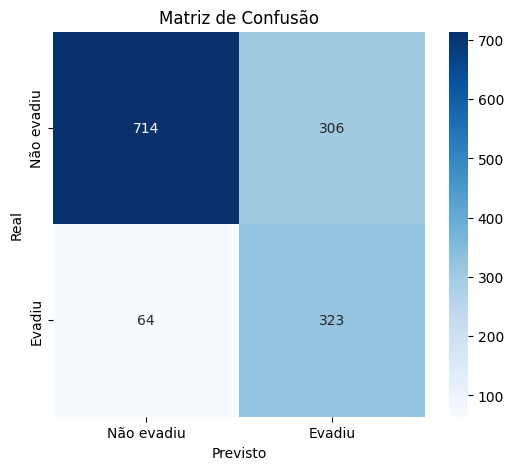

In [203]:
cm_val_rf_smenn = confusion_matrix(y_val, y_val_pred_rf_smenn)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_val_rf_smenn, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Não evadiu", "Evadiu"],
            yticklabels=["Não evadiu", "Evadiu"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

#### Tuning dos hiperparâmetros

In [204]:
# Numero de arvores em floresta aleatoria
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 100)]
# Numero de features a serem consideradas em cada splita
max_features = ['log2', 'sqrt']
# Profundidade maxima da arvore
max_depth = [1, 6, 11, 16, 21, None]
# Numero minimo de amostras para separar um nó
min_samples_split = [2, 5, 10]
# Numero minimo de amostras para cada nó de folha
min_samples_leaf = [1, 2, 4]

parametros = {
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }

random_search_rf_smenn = RandomizedSearchCV(rf_smenn, parametros, cv=5, scoring='recall', n_jobs=-1, random_state=42)
random_search_rf_smenn.fit(X_treino_smenn, y_treino_smenn)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 6, 11, 16, 21, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 109, 118, 127,
                                                         136, 145, 154, 163,
                                                         172, 181, 190, 200,
                                                         209, 218, 227, 236,
                                                         245, 254, 263, 272,
                                                         281, 290, 300, 309,
                                                         318, 327, 336, 345,
                                                         354, 363, ...]},
                   random_state=42, scoring='recall')

In [205]:
print("Melhores hiperparâmetros:", random_search_rf_smenn.best_params_)
print("Melhor Recall na validação cruzada:", random_search_rf_smenn.best_score_)

Melhores hiperparâmetros: {'n_estimators': 736, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 21}
Melhor Recall na validação cruzada: 0.979619540123742


#### Teste

In [206]:
y_teste_proba_rf_smenn = random_search_rf_smenn.predict_proba(X_teste)[:, 1]
y_teste_pred_rf_smenn = random_search_rf_smenn.predict(X_teste)

acuracia_teste_rf_smenn = accuracy_score(y_teste, y_teste_pred_rf_smenn)
precisao_teste_rf_smenn = precision_score(y_teste, y_teste_pred_rf_smenn)
recall_teste_rf_smenn = recall_score(y_teste, y_teste_pred_rf_smenn)
f1_teste_rf_smenn = f1_score(y_teste, y_teste_pred_rf_smenn)
roc_auc_teste_rf_smenn = roc_auc_score(y_teste, y_teste_proba_rf_smenn)

print("Acurácia no teste:", acuracia_teste_rf_smenn)
print("Precisão no teste:", precisao_teste_rf_smenn)
print("Recall no teste:", recall_teste_rf_smenn)
print("f1-Score no teste:", f1_teste_rf_smenn)
print("ROC AUC no teste:", roc_auc_teste_rf_smenn)

Acurácia no teste: 0.7128642501776831
Precisão no teste: 0.476038338658147
Recall no teste: 0.7967914438502673
f1-Score no teste: 0.596
ROC AUC no teste: 0.8228551387112973


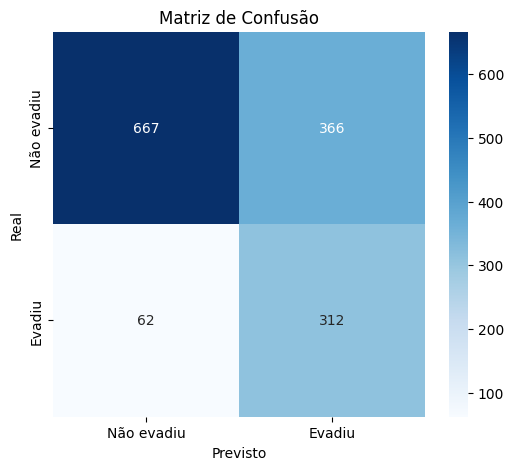

In [207]:
cm_teste_rf_smenn = confusion_matrix(y_teste, y_teste_pred_rf_smenn)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_teste_rf_smenn, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Não evadiu", "Evadiu"],
            yticklabels=["Não evadiu", "Evadiu"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

### Regressão Logística - SMOTEENN

In [208]:
lr_smenn = LogisticRegression(
                        random_state=42, # reproductibilidade
                        solver='liblinear', # bom para datasets pequenos
                        max_iter=1000 # permite alto número de iterações até encontrar a convergência
                        )

#### Treino

In [209]:
lr_smenn.fit(X_treino_smenn, y_treino_smenn)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

#### Validação

In [210]:
y_val_proba_lr_smenn = lr_smenn.predict_proba(X_val)[:, 1]
y_val_pred_lr_smenn = lr_smenn.predict(X_val)

acuracia_val_lr_smenn = accuracy_score(y_val, y_val_pred_lr_smenn)
precisao_val_lr_smenn = precision_score(y_val, y_val_pred_lr_smenn)
recall_val_lr_smenn = recall_score(y_val, y_val_pred_lr_smenn)
f1_val_lr_smenn = f1_score(y_val, y_val_pred_lr_smenn)
roc_auc_val_lr_smenn = roc_auc_score(y_val, y_val_proba_lr_smenn)

print("Acurácia na validação:", acuracia_val_lr_smenn)
print("Precisão na validação:", precisao_val_lr_smenn)
print("Recall na validação:", recall_val_lr_smenn)
print("f1-Score na validação:", f1_val_lr_smenn)
print("ROC AUC na validação:", roc_auc_val_lr_smenn)

Acurácia na validação: 0.6979388770433547
Precisão na validação: 0.4739010989010989
Recall na validação: 0.8914728682170543
f1-Score na validação: 0.6188340807174888
ROC AUC na validação: 0.8485458782996402


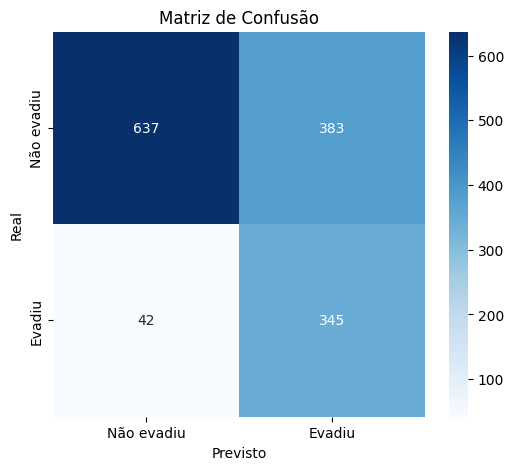

In [211]:
cm_val_lr_smenn = confusion_matrix(y_val, y_val_pred_lr_smenn)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_val_lr_smenn, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Não evadiu", "Evadiu"],
            yticklabels=["Não evadiu", "Evadiu"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

#### Tuning dos hiperparâmetros

In [212]:
parametros = {
              'C': [0.001, 0.01, 0.1, 1, 10, 100], # inverso da força de regularização
              'penalty': ['l1', 'l2'], # penalidade aplicada
              'class_weight': ['balanced', None], # pesos associados às classes, 'balanced' ajusta os pesos de modo inversamente proporcional a frequência das classes
        }

grid_search_lr_smenn = GridSearchCV(
                                lr_smenn,
                                parametros,
                                cv=5, # validação cruzada com 5 fols
                                scoring='recall' # otimizando para recall
                              )
grid_search_lr_smenn.fit(X_treino_smenn, y_treino_smenn)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, random_state=42,
                                          solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [213]:
print("Melhores hiperparâmetros:", grid_search_lr_smenn.best_params_)
print("Melhor Recall na validação cruzada:", grid_search_lr_smenn.best_score_)

Melhores hiperparâmetros: {'C': 0.01, 'class_weight': None, 'penalty': 'l1'}
Melhor Recall na validação cruzada: 0.9597182462728682


#### Teste

In [214]:
y_teste_proba_lr_smenn = grid_search_lr_smenn.predict_proba(X_teste)[:, 1]
y_teste_pred_lr_smenn = grid_search_lr_smenn.predict(X_teste)

acuracia_teste_lr_smenn = accuracy_score(y_teste, y_teste_pred_lr_smenn)
precisao_teste_lr_smenn = precision_score(y_teste, y_teste_pred_lr_smenn)
recall_teste_lr_smenn = recall_score(y_teste, y_teste_pred_lr_smenn)
f1_teste_lr_smenn = f1_score(y_teste, y_teste_pred_lr_smenn)
roc_auc_teste_lr_smenn = roc_auc_score(y_teste, y_teste_proba_lr_smenn)

print("Acurácia no teste:", acuracia_teste_lr_smenn)
print("Precisão no teste:", precisao_teste_lr_smenn)
print("Recall no teste:", recall_teste_lr_smenn)
print("f1-Score no teste:", f1_teste_lr_smenn)
print("ROC AUC no teste:", roc_auc_teste_lr_smenn)

Acurácia no teste: 0.6460554371002132
Precisão no teste: 0.42326732673267325
Recall no teste: 0.9144385026737968
f1-Score no teste: 0.5786802030456852
ROC AUC no teste: 0.8244224029486829


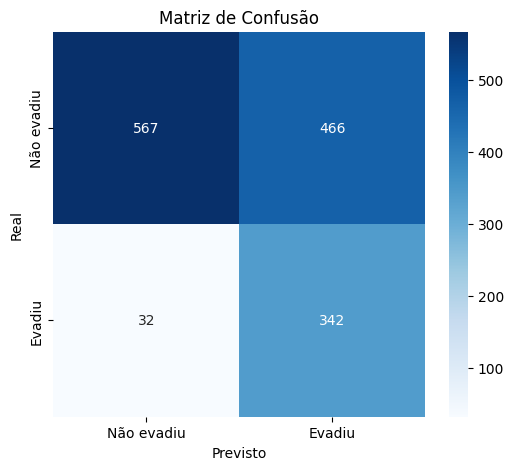

In [215]:
cm_teste_lr_smenn = confusion_matrix(y_teste, y_teste_pred_lr_smenn)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_teste_lr_smenn, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Não evadiu", "Evadiu"],
            yticklabels=["Não evadiu", "Evadiu"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()